<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [28]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [29]:
# Read in data using csv module and create list of lists
sat_scores_path = './sat_scores.csv'

scores_csv = []

with open(sat_scores_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        scores_csv.append(row)
        
scores_csv[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [30]:
#Need to put into a dictionary:

with open('./sat_scores.csv','r') as f:
    sat_scores = [row for row in csv.reader(f)]
f.close()



### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [31]:
import pandas as pd

scores_pd = pd.read_csv('./sat_scores.csv')
#print (scores_pd)

#header = 1st item (lists of list) in the list 
header = sat_scores[0]

#data = items (list of list) after header
data = sat_scores[1:]

#Make the header and data in a dictionary through list comprehension
scores_pd_dict = {title:[row[index] for row in data] for index,title in enumerate(header)}

scores_pd_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

In [63]:
#convert dataframe to dataframe object:

df_sat_scores = pd.DataFrame(scores_pd_dict)

df_sat_scores.head()

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [64]:
df_sat_scores.tail()

State Rate Verbal Math
47    IA    5    593  603
48    SD    4    577  582
49    ND    4    592  599
50    MS    4    566  551
51   All   45    506  514

In [65]:
#convert csv file to dataframe object using .read_csv():

df_sat_scores_read = pd.read_csv('./sat_scores.csv')

df_sat_scores_read.tail()



State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [66]:
df_sat_scores.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [67]:
df_sat_scores_read.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [39]:
df_sat_scores_read.head(11)

State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499

In [40]:
df_sat_scores_read.tail(11)

State  Rate  Verbal  Math
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [42]:
# Have seen that we have an uneccessary row 51 which show's ALL, 45, 506, 514. 
# Dropping that row here.

df_sat_scores_read.drop((51), inplace = True)    

In [44]:
df_sat_scores_read.describe().T

count        mean        std    min    25%    50%    75%    max
Rate     51.0   37.000000  27.550681    4.0    9.0   33.0   64.0   82.0
Verbal   51.0  532.529412  33.360667  482.0  501.0  527.0  562.0  593.0
Math     51.0  531.843137  36.287393  439.0  503.0  525.0  557.5  603.0

Rate: Participation rate of students taking their SAT's


Verbal: Mean score of Verbal SAT


Math: Mean score of Math SAT

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [45]:
data_dictionary = {'shapes' : {'row':52,'col': 4} , 'columns' : ['State','Rate','Verbal','Math']}

data_dictionary.update(df_sat_scores_read.describe().to_dict(orient='dict'))

data_dictionary

{'shapes': {'row': 52, 'col': 4},
 'columns': ['State', 'Rate', 'Verbal', 'Math'],
 'Rate': {'count': 51.0,
  'mean': 37.0,
  'std': 27.550680572356104,
  'min': 4.0,
  '25%': 9.0,
  '50%': 33.0,
  '75%': 64.0,
  'max': 82.0},
 'Verbal': {'count': 51.0,
  'mean': 532.5294117647059,
  'std': 33.360667224248665,
  'min': 482.0,
  '25%': 501.0,
  '50%': 527.0,
  '75%': 562.0,
  'max': 593.0},
 'Math': {'count': 51.0,
  'mean': 531.843137254902,
  'std': 36.28739315465888,
  'min': 439.0,
  '25%': 503.0,
  '50%': 525.0,
  '75%': 557.5,
  'max': 603.0}}

In [46]:
# Another way of doing this without using the describe function

sat_scores_dictionary = {'Variables' : df_sat_scores_read.columns,
                         'Variable types': df_sat_scores_read.dtypes,
                         'Variable description': ['State data applicable to',
                                                    'Participation Rate of students in the state taking the SATs',
                                                    'Mean score of Verbal SATs',
                                                    'Mean score of Math SATs'],
                         'Shape of dataset': df_sat_scores_read.shape
                            }

print(sat_scores_dictionary)

{'Variables': Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object'), 'Variable types': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object, 'Variable description': ['State data applicable to', 'Participation Rate of students in the state taking the SATs', 'Mean score of Verbal SATs', 'Mean score of Math SATs'], 'Shape of dataset': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('fivethirtyeight')

Setting up a hist plotter function which will accept data (dataframe or dictionary), header (column title or key) and n_bins - the number of bins wanted in the histogram and prints out a histogram using seaborn

In [48]:
def histplotter(data, header, n_bins = 10):
    sns.set(rc = {"figure.figsize" : (7,5)})
    sns.set(color_codes = True)
    sns.set(style = "whitegrid", palette = 'dark')
    hist = sns.distplot(data[header], bins = n_bins, kde = False)
    hist.set_title('Histogram of ' + header + '\n', fontsize = 16)

For the above function to work we need to drop the total row so as to not skew the data due to an overall datapoint. 

In [68]:
df_sat_scores_read.drop((df_sat_scores_read.loc[df_sat_scores_read['State'] == 'ALL']).index, inplace = True)

C:\Users\vgoun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


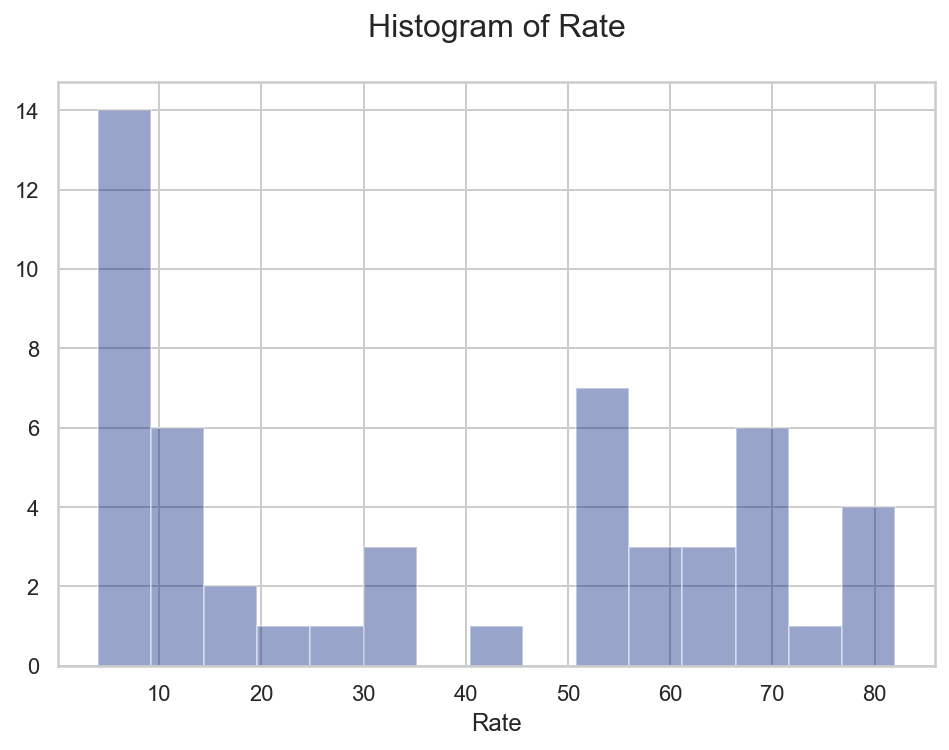

In [69]:
# Call Rate Data

histplotter(df_sat_scores_read, 'Rate', n_bins = 15)

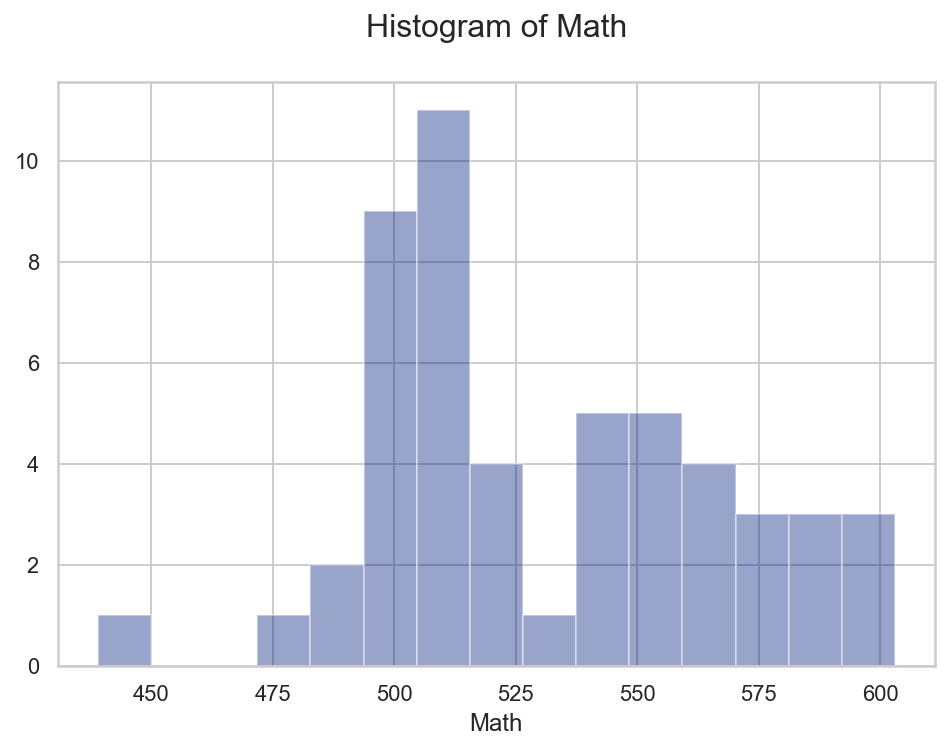

In [70]:
# Call function for Math Data

histplotter(df_sat_scores_read, 'Math', n_bins = 15)

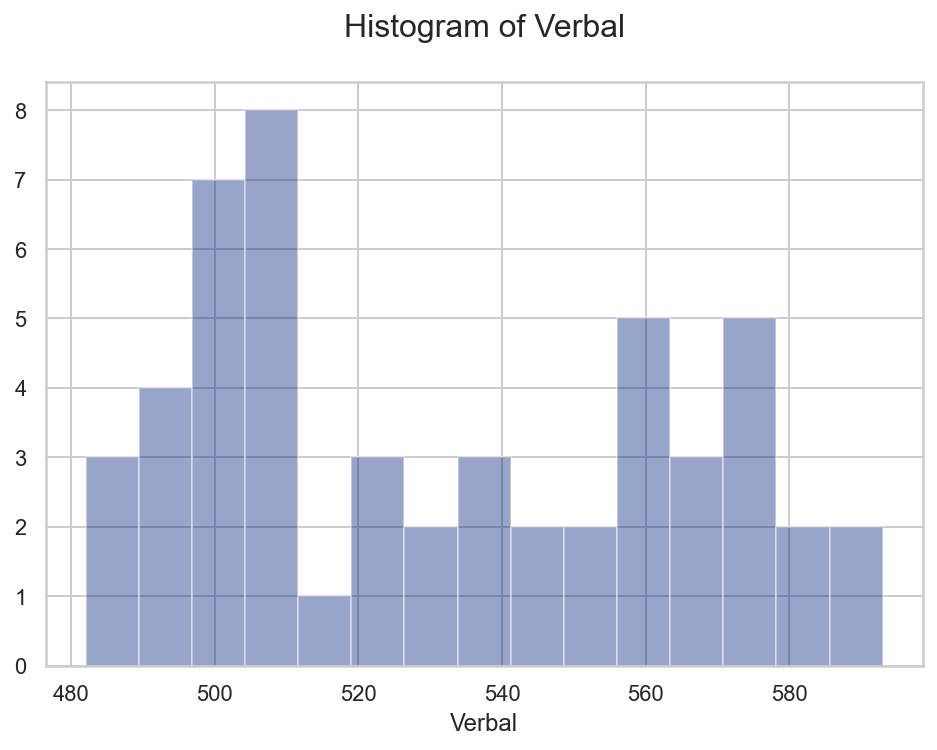

In [71]:
# Call function for Verbal Data

histplotter(df_sat_scores_read, 'Verbal', n_bins = 15)

Text(0.5, 1.0, 'Histogram of Rate')

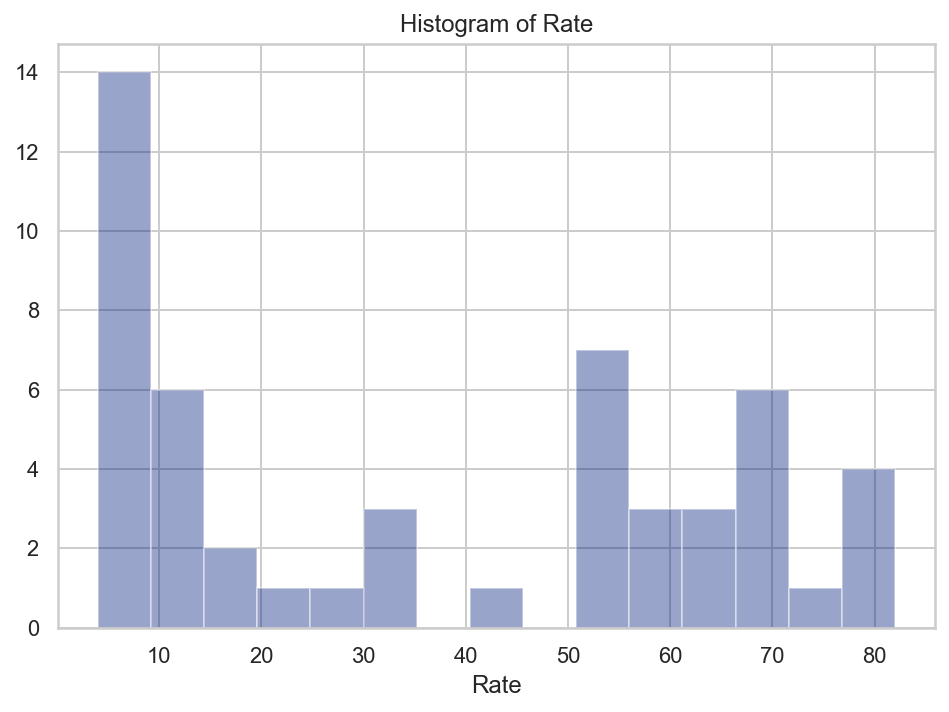

In [72]:
sns.distplot(df_sat_scores_read.Rate, color = "b", bins = 15, kde = False).set_title('Histogram of Rate')

Text(0.5, 1.0, 'Histogram of Math')

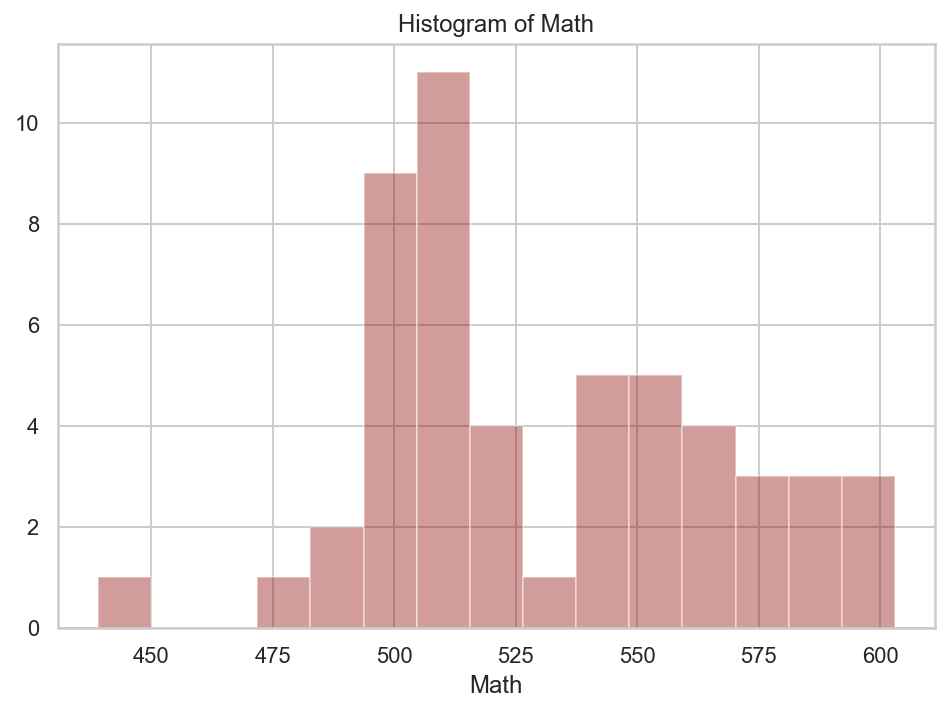

In [24]:
sns.distplot(df_sat_scores_read.Math, color = "r", bins = 15, kde = False).set_title('Histogram of Math')

Text(0.5, 1.0, 'Histogram of Verbal')

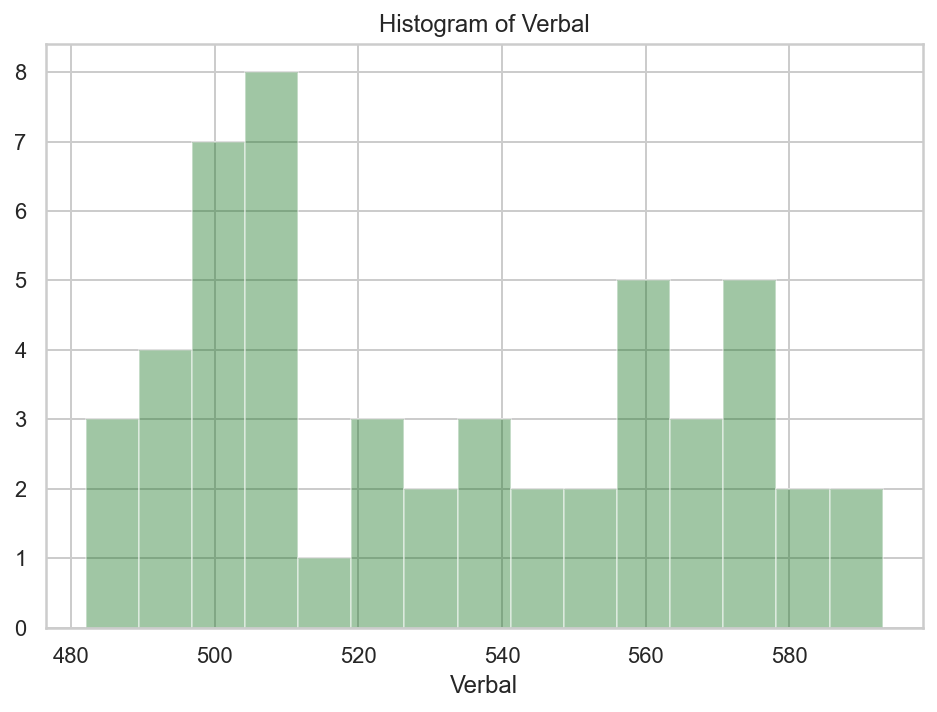

In [25]:
sns.distplot(df_sat_scores_read.Verbal, color = "g", bins = 15, kde = False).set_title('Histogram of Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Using the above function with a few slight tweaks to call a pairplot 

In [56]:
def pairplotter(data, headers):
    sns.set(rc={"figure.figsize": (100, 10)})    
    sns.set(color_codes=True)
    sns.set(style="whitegrid", palette="dark")
    return sns.pairplot(data[headers], kind='reg', diag_kind='hist', height=4, aspect=1)

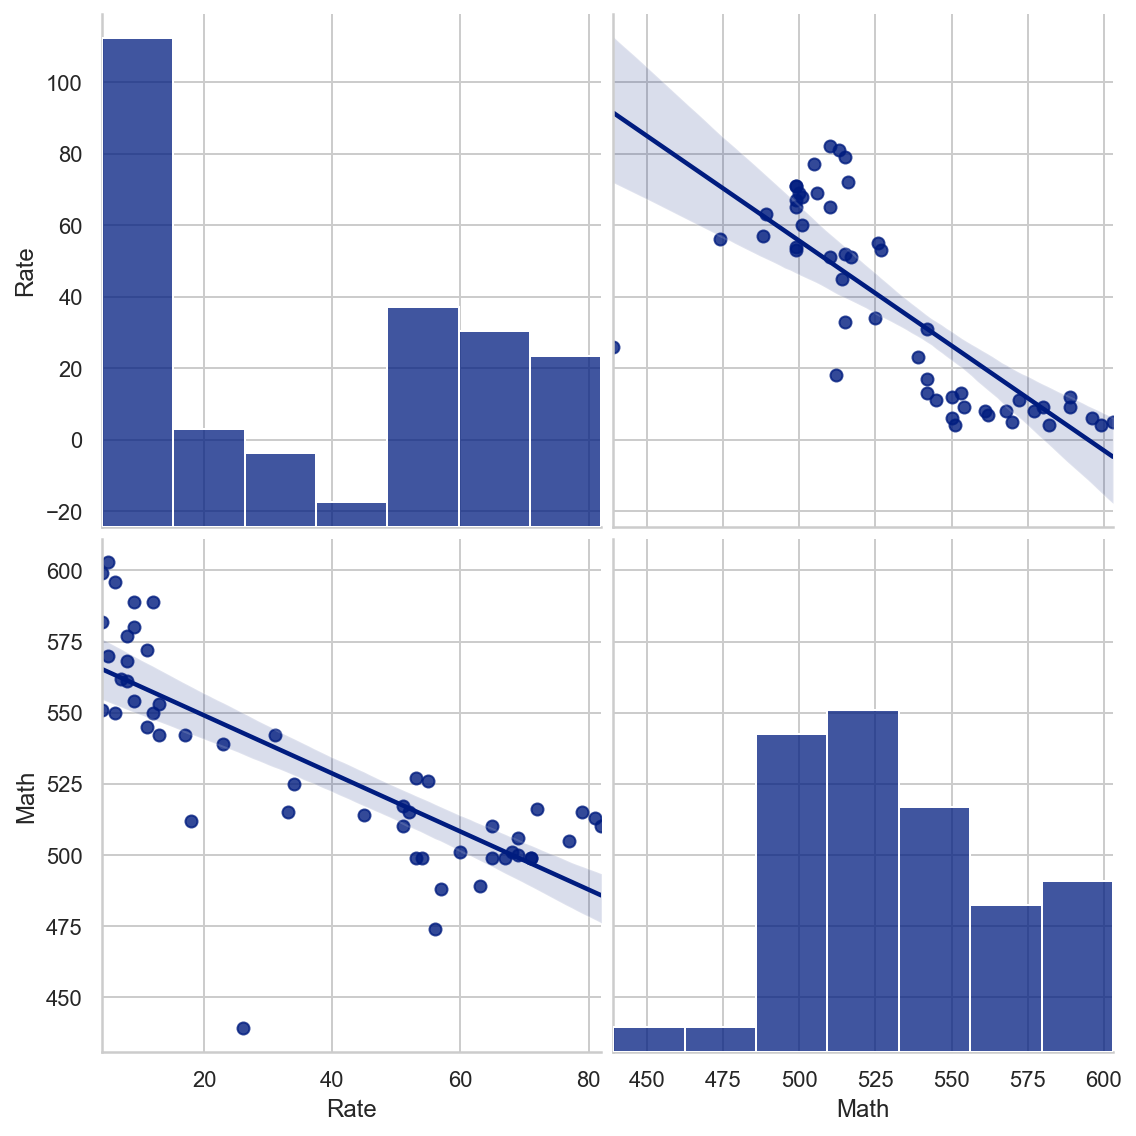

In [73]:
pairplotter(df_sat_scores_read, ['Rate', 'Math'])


This output shows that generally the Rate and Math variables are inversely proportional (the higher the rate the of students taking the SATs, the lower the average Math score). This output clearly shows an outlier within the data where the Math score is particularly low for a given state

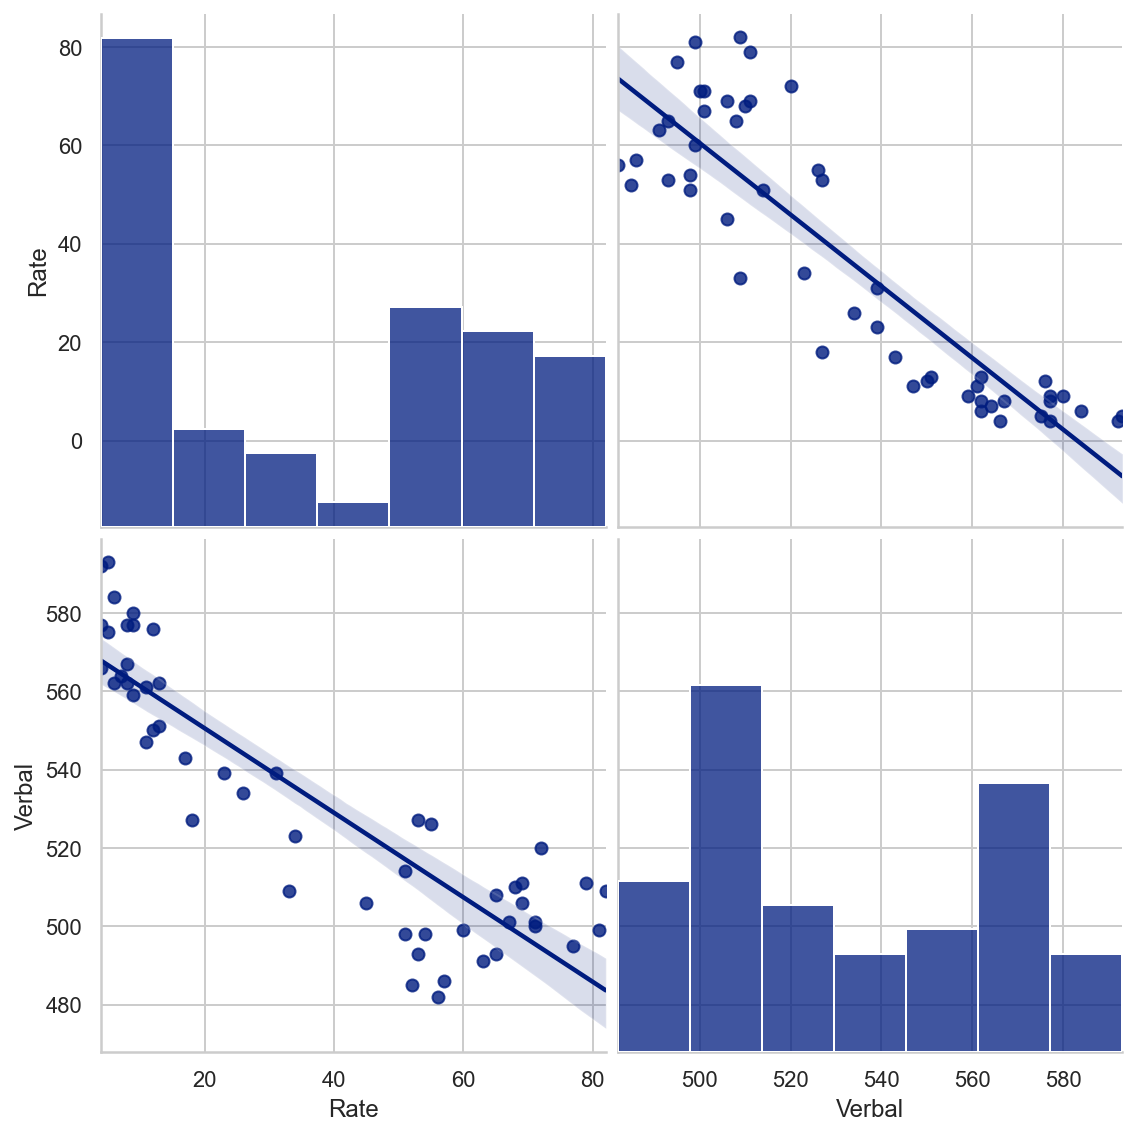

In [75]:
pairplotter(df_sat_scores_read, ['Rate', 'Verbal'])

This output shows that generally the Rate and Verbal variables are inversely proportional (the higher the rate the of students taking the SATs, the lower the average Verbal score)

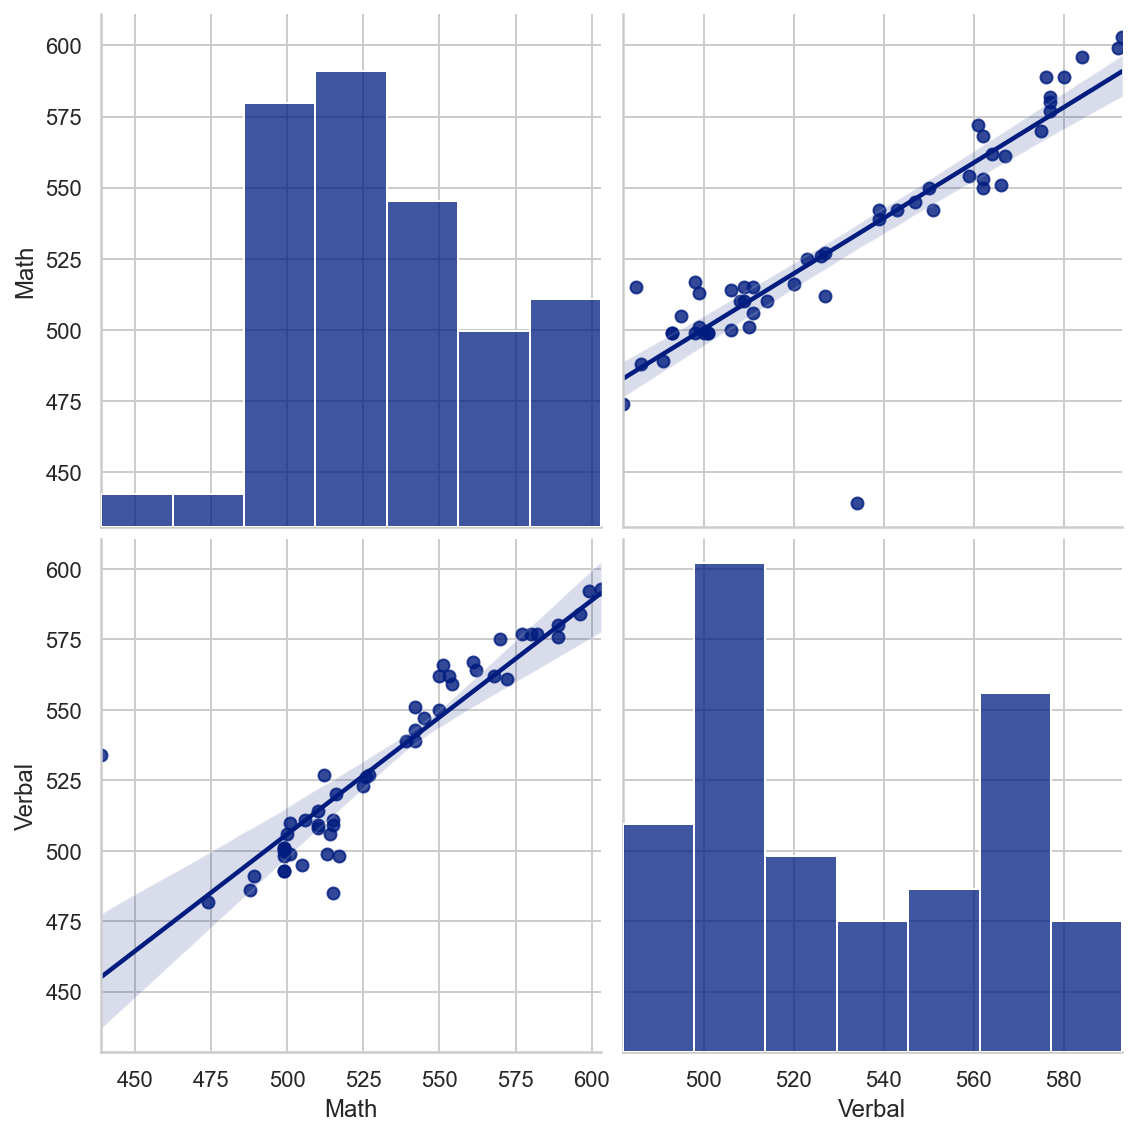

In [77]:
pairplotter(df_sat_scores_read, ['Math', 'Verbal'])

This output shows that generally the Math and Verbal variables are proportional (the higher the average Math score, the higher the average Verbal score).

This output again clearly shows an outlier within the data where the Math score is particularly low for a given state.

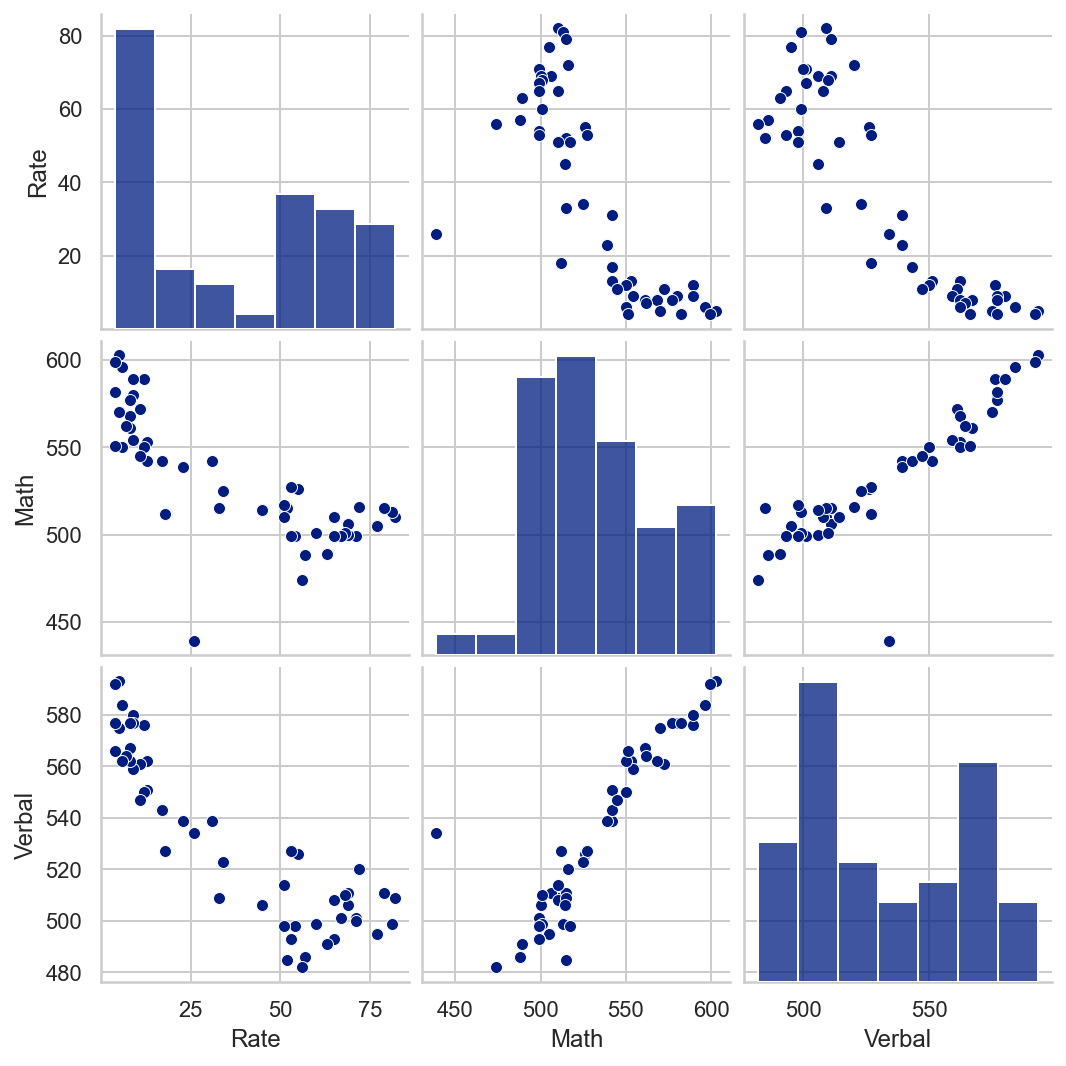

In [80]:


sns.pairplot(df_sat_scores_read[['Rate', 'Math', 'Verbal']])
sns.set(rc={'figure.figsize':(20,10)})


Positive Correlation = Math and Verbal
Negative Correlation = Rate against both Verbal and Math

**Rate and Math:**

The output here shows the variables of Math and Rate are inversely propotional. We can see an outlier in this pair. 

**Rate and Verbal:**

The output shows the variables of Rate and Verbal are also inversely proportional. Which shows the higher the rate of student taking their SATs, the lower the average of Verbal.

**Math and Verbal:**

The output shows the Math and Verbal variables as positively correlated. We can quickly infer that the higher the average of Verbal, the higher the average of Math score. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 1.0, 'Stacked histogram of Verbal and Math')

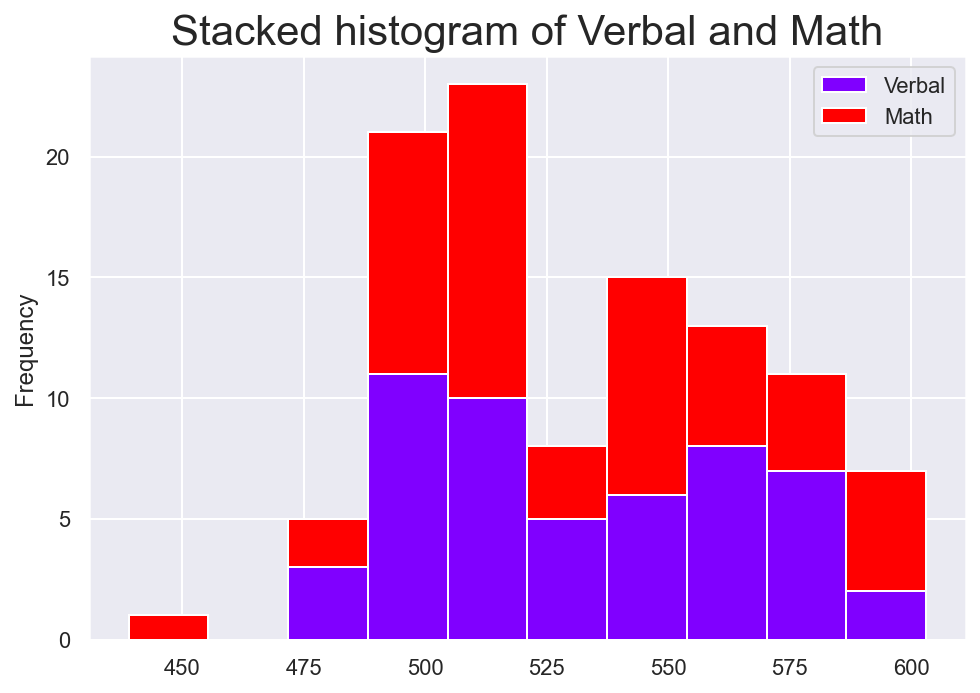

In [83]:
import matplotlib.pyplot as plt

stacked_hist = df_sat_scores_read[['Verbal', 'Math']].plot(kind='hist',figsize = (7,5), stacked = True, colormap = 'rainbow')

stacked_hist.set_title('Stacked histogram of Verbal and Math', fontsize = 21)



### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

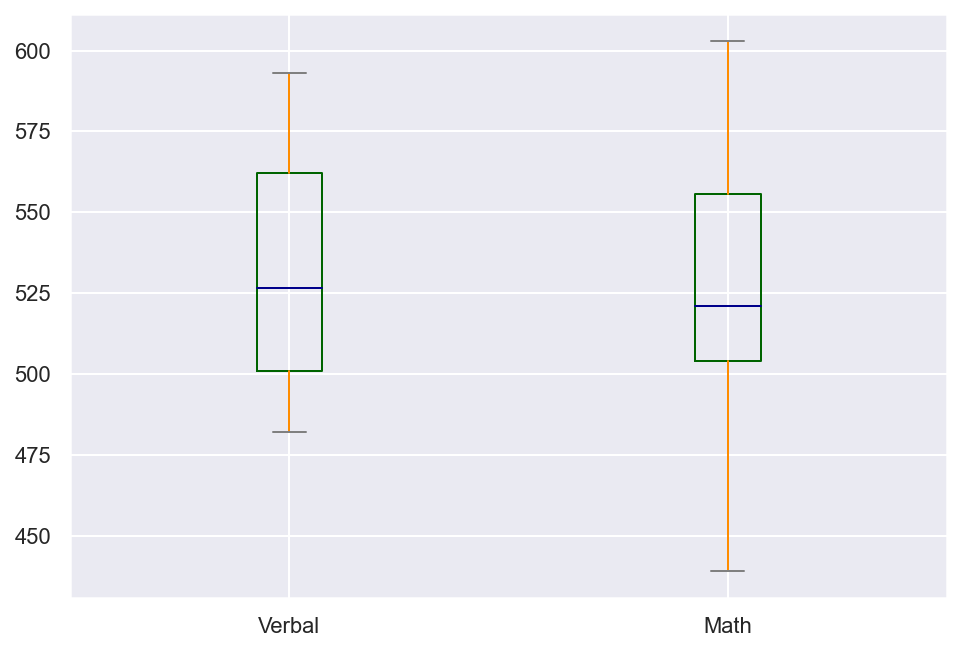

In [88]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
df_sat_scores_read[['Verbal', 'Math']].plot.box(color = color, figsize = (7,5))


The variable 'Rate' is in differing units/on a different scale to Verbal and Math and as such plotting on the same boxplot does not produce a useful output.

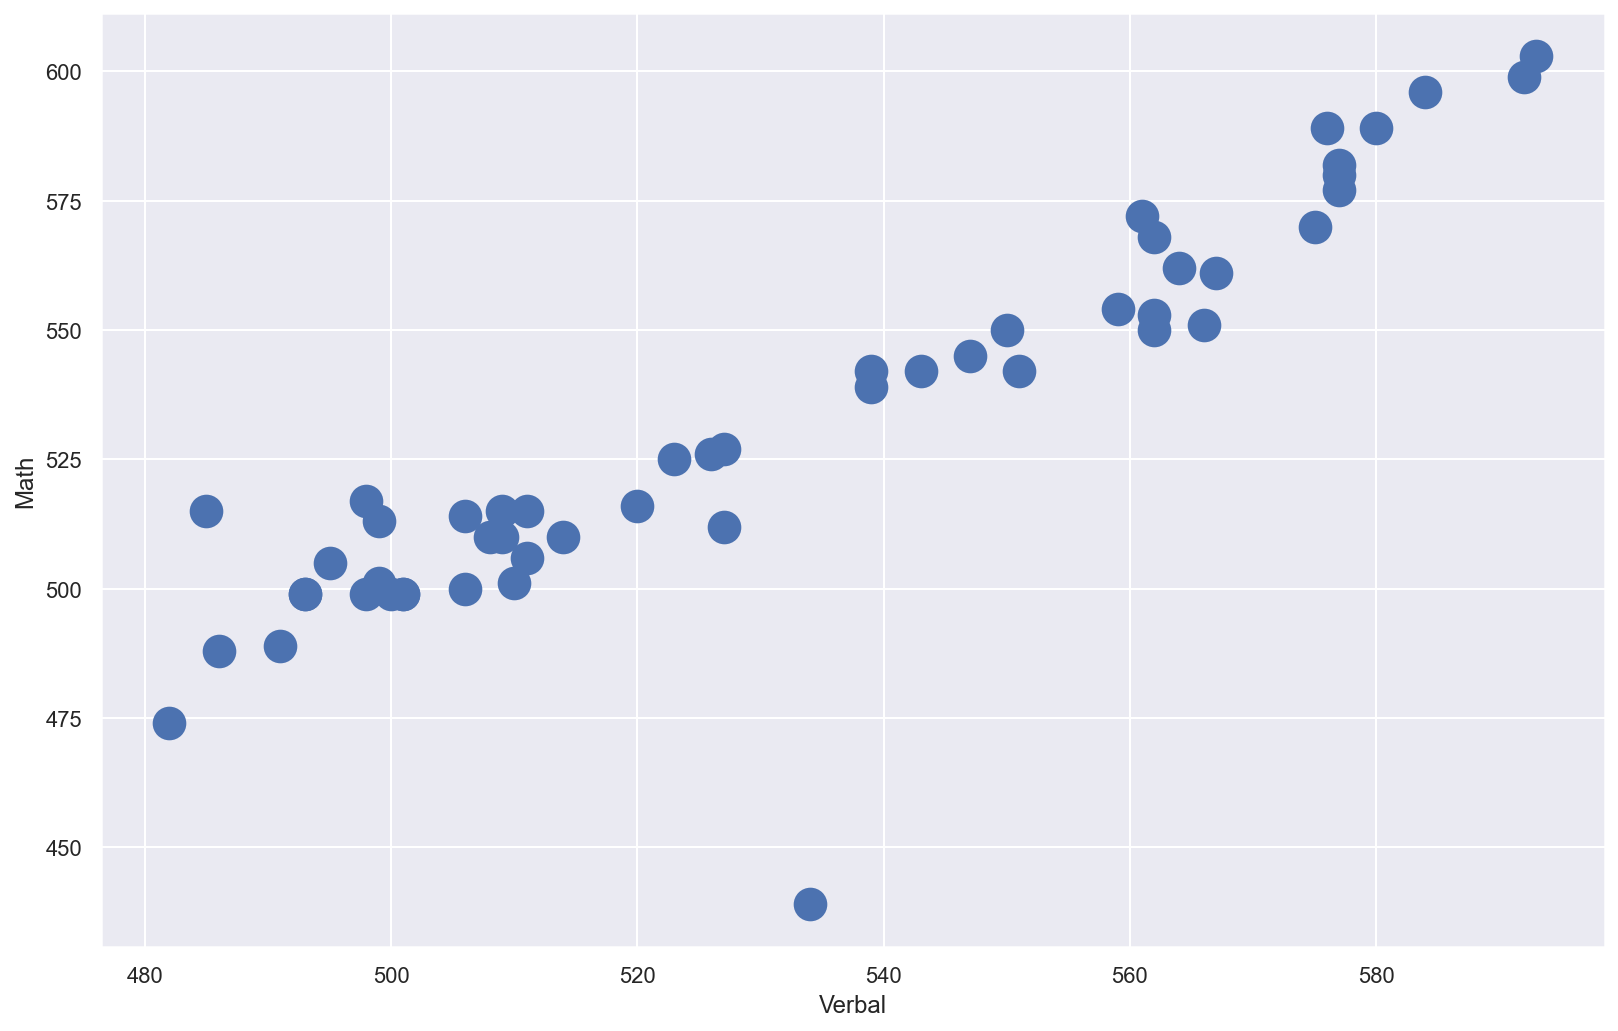

In [90]:
# Plotting the SAT Scores in a scatter plot to show the difference between having a box plot

df_sat_scores_read.plot(kind='scatter', x='Verbal', y='Math', figsize = (12,8), s = 250, c = 'b') 

**What are the benefits of using a boxplot as compared to a scatterplot or a histogram?** 

- Benefits of using a box plot would be having the visibilty to see the median plus the IQR + visibility of outliers 
- Compared against a scatterplot you can see the correlation easily. 
- The scatter plot and histogram visualisations are better for displaying relationships & distributions. 
- Each graph has their own positives and negatives. 

- Box plot and histograms is similar in the sense that it can help visualise and describe numeric data. 
- Box plot allows us to compare multiple data sets better than histograms - given less detailed and save more space. 
- Box plots allow us to  to quickly summarize distributions

- Plotting 2 data sets as a histogram would be messy. 


What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

- Rate is on the lower end of 100, vs Verbal and Math which are on the higher end of 500. Therefore not adequate for comparison. 

- As we will see below in the next question 4.3


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


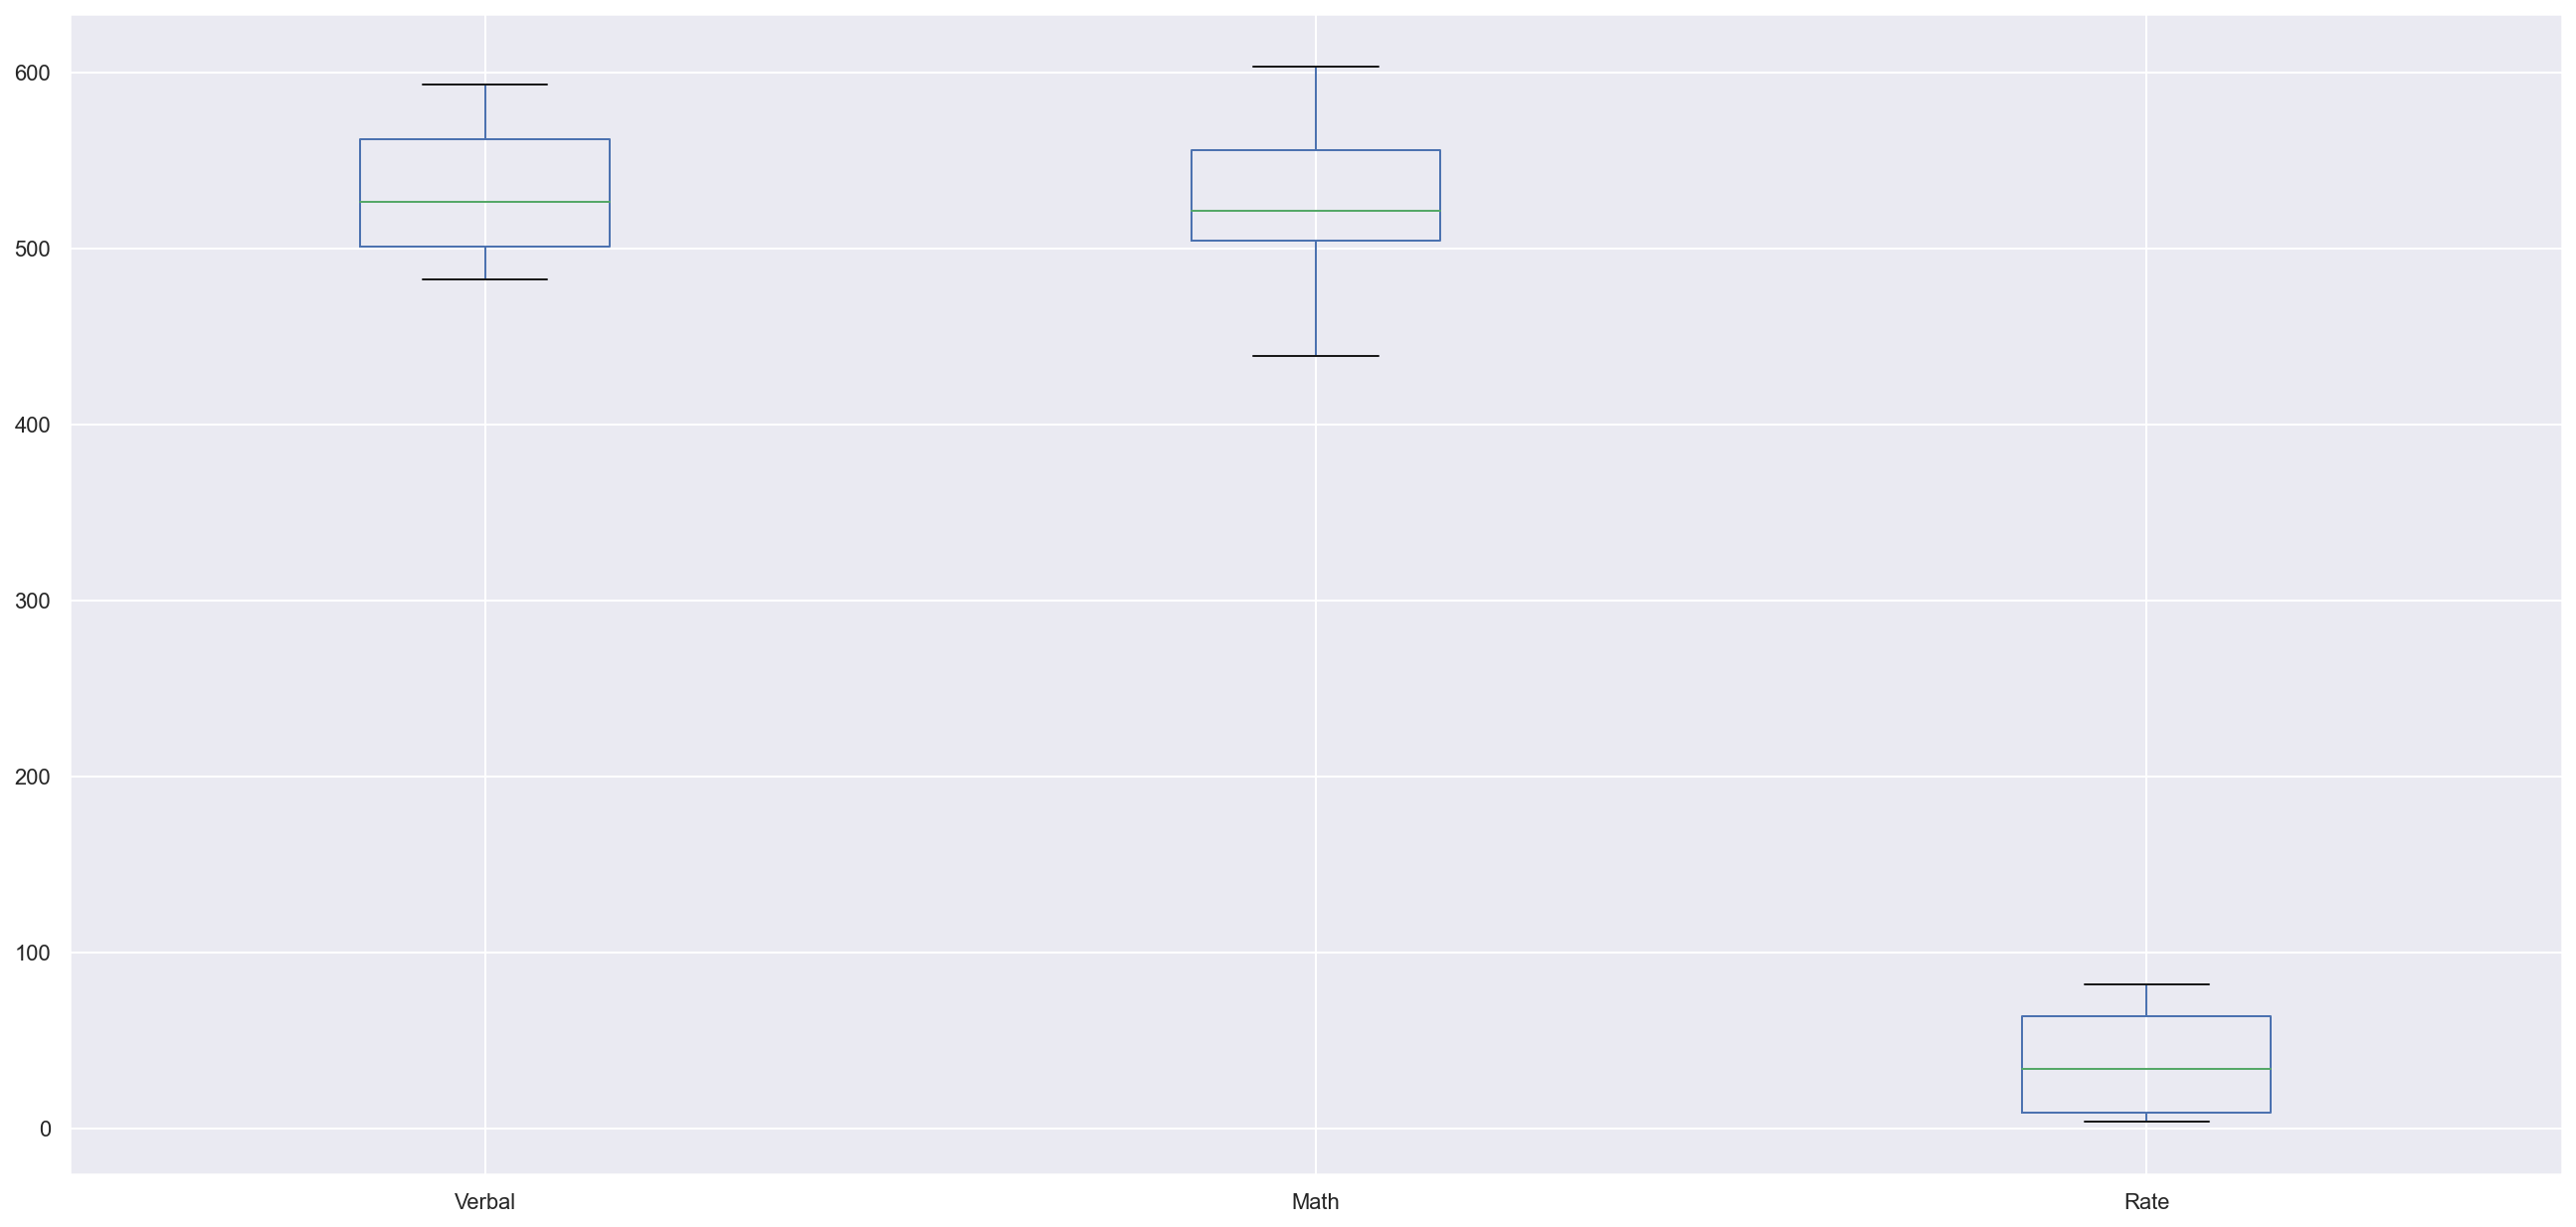

In [91]:
# 1. Plotting the 3 variables on the same boxplot chart. 
# 2. They aren't standardised yet so I want to show the implications of not converting to a Z scale first. 

df_sat_scores_read[['Verbal', 'Math', 'Rate']].plot(kind='box')

A way of being able to change the variables so they could make sense on the same chart would be using a standardised scale, such as the z scale. 

In [92]:
test_verbal = (df_sat_scores_read.Verbal-df_sat_scores_read.Verbal.mean())/df_sat_scores_read.Verbal.std()
test_math = (df_sat_scores_read.Math-df_sat_scores_read.Math.mean())/df_sat_scores_read.Math.std()
test_rate = (df_sat_scores_read.Rate-df_sat_scores_read.Rate.mean())/df_sat_scores_read.Rate.std()

[Text(0, 0, 'Verbal'), Text(0, 0, 'Math'), Text(0, 0, 'Rate')]

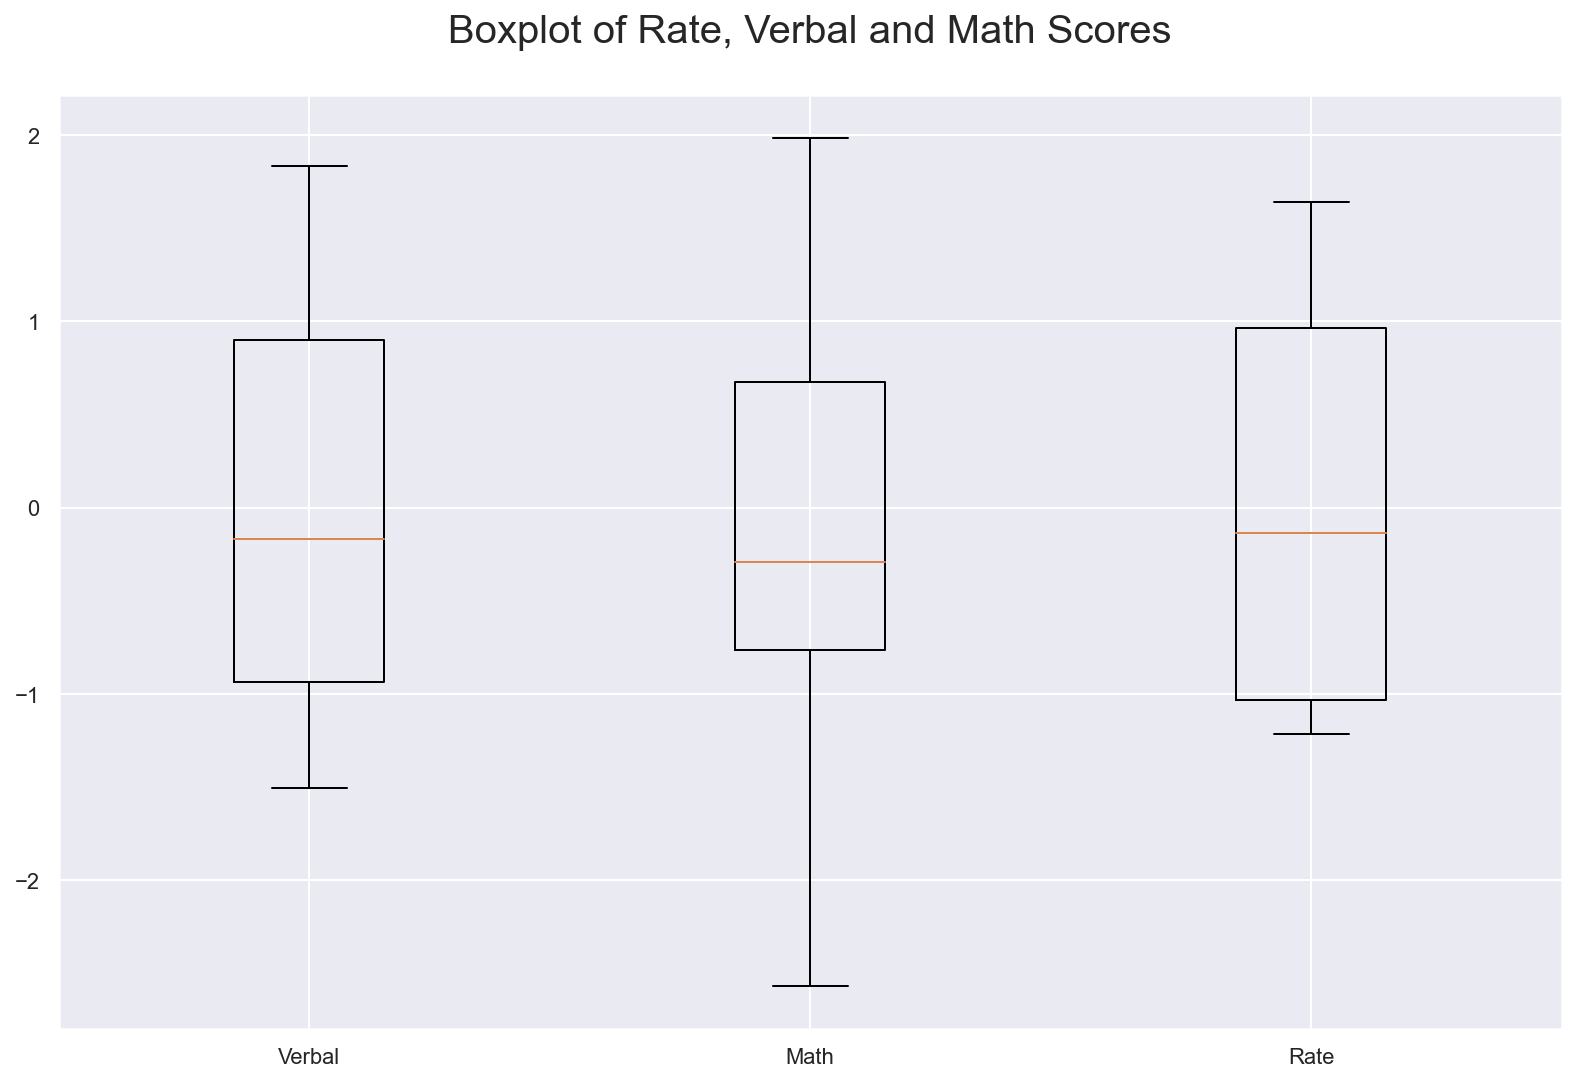

In [93]:
verbal_math_rate = [test_verbal, test_math, test_rate]

#Create a figure
fig = plt.figure(figsize=(12, 8))

# #Create an axes instance
ax = fig.gca()
ax.set_title('Boxplot of Rate, Verbal and Math Scores\n', size=20,)

#Create a box plot
box_plot = ax.boxplot(verbal_math_rate)

#Create labels for box plot
ax.set_xticklabels(['Verbal','Math','Rate'])

By standardising the scales we are now able to compare apples against apples. 
As a result of this standardisation we are able to see a true representation of the distribution against the mean.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [94]:
# Finding the mean of Verbal
np.mean(df_sat_scores_read['Verbal'])

532.0192307692307

In [97]:
#list out all the states that have 'Verbal score above the mean.

#verbal_above_mean = 

df_sat_scores_read.loc[df_sat_scores_read['Verbal'] > np.mean(df_sat_scores_read['Verbal']),['State', 'Verbal']]

# print(np.mean(df_sat_scores_read['Verbal']) - 532.0192307692307)

#count the unique number of the status that its 'Verbal score above the mean.
# print(verbal_above_mean['State'].value_counts())

#print the dataframe of verbal above mean
# verbal_above_mean

State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566

In [98]:
len(df_sat_scores_read.loc[df_sat_scores_read['Verbal'] > np.mean(df_sat_scores_read['Verbal']),['State', 'Verbal']])

24

We have 24 out of 50 states that have a higher verbal score than the average verbal score. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [101]:
# Finding the median
print(np.median(df_sat_scores_read['Verbal']))

df_sat_scores_read.loc[df_sat_scores_read['Verbal'] > np.median(df_sat_scores_read['Verbal']), ['State', 'Verbal']]



526.5


State  Verbal
19    WA     527
26    CO     539
27    OH     534
28    MT     539
29    WV     527
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566

In [102]:
len(df_sat_scores_read.loc[df_sat_scores_read['Verbal'] > np.median(df_sat_scores_read['Verbal']), ['State', 'Verbal']])

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [104]:
# Adding a new column labelled as Verbal - Math

df_sat_scores_read['Verbal - Math'] = df_sat_scores_read['Verbal'] - df_sat_scores_read['Math']
df_sat_scores_read.head(10)



State  Rate  Verbal  Math  Verbal - Math
0    CT    82     509   510             -1
1    NJ    81     499   513            -14
2    MA    79     511   515             -4
3    NY    77     495   505            -10
4    NH    72     520   516              4
5    RI    71     501   499              2
6    PA    71     500   499              1
7    VT    69     511   506              5
8    ME    69     506   500              6
9    VA    68     510   501              9

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.


create a new DataFrame by sorting values in previous DataFrame on Verbal - Math descending. Use iloc to only take first 10 columns and print out the top 3 rows.

In [113]:
df_verbal_over_math= df_sat_scores_read.sort_values(['Verbal - Math'], ascending=False).iloc[:10].reset_index(drop = True)
df_verbal_over_math.head(5)

State  Rate  Verbal  Math  Verbal - Math
0    OH    26     534   439             95
1    MS     4     566   551             15
2    WV    18     527   512             15
3    AR     6     562   550             12
4    NM    13     551   542              9

create a new DataFrame by sorting values in previous DataFrame on Verbal - Math ascending. Use iloc to only take first 10 columns and print out the top 3 rows.

In [115]:
math_over_verbal= df_sat_scores_read.sort_values(['Verbal - Math'], ascending=True).iloc[:10].reset_index(drop = True)
math_over_verbal.head(5)

State  Rate  Verbal  Math  Verbal - Math
0    HI    52     485   515            -30
1    CA    51     498   517            -19
2    NJ    81     499   513            -14
3    IL    12     576   589            -13
4    WI     6     584   596            -12

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [117]:
df_sat_scores_read[['Rate', 'Verbal', 'Math']].corr(method = 'pearson')

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

From the above correlation matrix, we can see that Math and Verbal are positively correlated

However, Rate is strongly negatively correlated to both Math and Verbal, but more so with Verbal. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [126]:
# Transposed the describe function () to show it differently
df_sat_scores_read.describe()

Rate      Verbal        Math  Verbal - Math
count  51.000000   51.000000   51.000000      51.000000
mean   37.000000  532.529412  531.843137       0.686275
std    27.550681   33.360667   36.287393      15.839811
min     4.000000  482.000000  439.000000     -30.000000
25%     9.000000  501.000000  503.000000      -6.000000
50%    33.000000  527.000000  525.000000       0.000000
75%    64.000000  562.000000  557.500000       4.500000
max    82.000000  593.000000  603.000000      95.000000

We can infer from the describe function that we have a total of 52 items in each column.
Average is roughly the same for both Verbal and Math. Conversely, the median is very similar as well for the two.
We have an outlier in the "rate" column of 4 which will have an impact on our stats. 


- Count - Number of observations within the column
- Mean - Mean of the observations in the column
- Std - Standard Deviation of the observations within the column
- Min - Minimum value of the observations within the column
- 25% - 25th %ile value of the observations within the column
- 50% - Median of the observations in the column
- 75% - 75th %ile value of the observations within the column
- Max - Maximum value of the observations within the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [127]:
# Showing covariance via pandas 

df_sat_scores_read[['Rate','Verbal','Math']].cov()

Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902

1. Covariance measures the variance between 2 variables. Defined as a systematic relationship between a pair of random variables. A positive covariance means the variables are positively related and go up together, whereas a negative covariance means the variables are inversely related. 


2. The correlation between two variables is the covariance between both variables divided by the product of the standard deviation of the variables X and Y. 


3. Correlation is better for looking at relationships within our data becauuse it is normalised between -1 and 1.
Whereas covariance is measured in the units of two variables multipled. Hence that is why correlation matrix is preferred over covariance matrix.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [130]:
# Loading the data into a dataframe. 
df_drug_use = pd.read_csv('./drug-use-by-age.csv')

df_drug_use

# Can see 2 problems so far, the age buckets and the dashes in some cells e.g. crack frequency
# regarding the buckets - look at averaging the two?
# Look at imputing an Nan on the dash? or can we add the average in the dashes - what can we do with the missing data? 


age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0                -  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2                -  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16               -  ...            0.0                   -               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 

In [131]:
df_drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [132]:
# We need to change the age buckets to an average so we can use that in our EDA. 
# Note: have chosen to go with the age of 65 for the 22nd line, 65+. Instead of doing averaging 65 + 100/2.  


age_replace = {
    '12' : 12.,
    '13' : 13.,
    '14' : 14.,
    '15' : 15.,
    '16' : 16.,
    '17' : 17.,
    '18' : 18.,
    '19' : 19.,
    '20' : 20.,
    '21' : 21.,
    '22-23' : 22.5,
    '24-25' : 24.5,
    '26-29' : 27.5,
    '30-34' : 32.,
    '35-49' : 42.,
    '50-64' : 57.,
    '65+' : 65
}

df_drug_use['age'] = df_drug_use.age.map(lambda x: age_replace[x])

In [133]:
#  this shows the age buckets broken up into an averaged out number 
df_drug_use

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12.0  2798          3.9                3.0            1.1   
1   13.0  2757          8.5                6.0            3.4   
2   14.0  2792         18.1                5.0            8.7   
3   15.0  2956         29.2                6.0           14.5   
4   16.0  3058         40.1               10.0           22.5   
5   17.0  3038         49.3               13.0           28.0   
6   18.0  2469         58.7               24.0           33.7   
7   19.0  2223         64.6               36.0           33.4   
8   20.0  2271         69.7               48.0           34.0   
9   21.0  2354         83.2               52.0           33.0   
10  22.5  4707         84.2               52.0           28.4   
11  24.5  4591         83.1               52.0           24.9   
12  27.5  2628         80.7               52.0           20.8   
13  32.0  2864         77.5               52.0           16.4   
14  42.0  7391         75.0               52.0           10.4   
15  57.0  3923         67.2               52.0            7.3   
16  65.0  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0                -  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2                -  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16               -  ...            0.0                   -               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 2.0       0.0   


In [135]:
# inserted a lambda function with applymap to replace the dashes with NaN. 
# this converts all numbers that are strings / integers into floats
# None values are inserted here rather than imputing means / medians values so as to not create artificially skewed datapoints
# applying function to the dataframe element wise. 

df_drug_use = df_drug_use.applymap(lambda x: np.nan if x == '-' else float(x))

df_drug_use

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12.0  2798.0          3.9                3.0            1.1   
1   13.0  2757.0          8.5                6.0            3.4   
2   14.0  2792.0         18.1                5.0            8.7   
3   15.0  2956.0         29.2                6.0           14.5   
4   16.0  3058.0         40.1               10.0           22.5   
5   17.0  3038.0         49.3               13.0           28.0   
6   18.0  2469.0         58.7               24.0           33.7   
7   19.0  2223.0         64.6               36.0           33.4   
8   20.0  2271.0         69.7               48.0           34.0   
9   21.0  2354.0         83.2               52.0           33.0   
10  22.5  4707.0         84.2               52.0           28.4   
11  24.5  4591.0         83.1               52.0           24.9   
12  27.5  2628.0         80.7               52.0           20.8   
13  32.0  2864.0         77.5               52.0           16.4   
14  42.0  7391.0         75.0               52.0           10.4   
15  57.0  3923.0         67.2               52.0            7.3   
16  65.0  2448.0         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                NaN        0.0   

    crack-frequency  ...  oxycontin-use  oxycontin-frequency  \
0               NaN  ...            0.1                 24.5   
1               3.0  ...            0.1                 41.0   
2               NaN  ...            0.4                  4.5   
3               9.5  ...            0.8                  3.0   
4               1.0  ...            1.1                  4.0   
5              21.0  ...            1.4                  6.0   
6              10.0  ...            1.7                  7.0   
7               2.0  ...            1.5                  7.5   
8               5.0  ...            1.7                 12.0   
9              17.0  ...            1.3                 13.5   
10              5.0  ...            1.7                 17.5   
11              6.0  ...            1.3                 20.0   
12              6.0  ...            1.2                 13.5   
13             15.0  ...            0.9                 46.0   
14             48.0  ...            0.3                 12.0   
15             62.0  ...            0.4                  5.0   
16              NaN  ...            0.0                  NaN   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2                0.9                     5.0            0.8   
3                2.0                     4.5            1.5   
4                2.4                    11.0            1.8   
5     

In [137]:
df_drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     float64
 1   n                        17 non-null     float64
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [138]:
df_drug_use.describe().T

count         mean          std     min       25%  \
age                       17.0    25.617647    15.356726    12.0    16.000   
n                         17.0  3251.058824  1297.890426  2223.0  2469.000   
alcohol-use               17.0    55.429412    26.878866     3.9    40.100   
alcohol-frequency         17.0    33.352941    21.318833     3.0    10.000   
marijuana-use             17.0    18.923529    11.959752     1.1     8.700   
marijuana-frequency       17.0    42.941176    18.362566     4.0    30.000   
cocaine-use               17.0     2.176471     1.816772     0.0     0.500   
cocaine-frequency         16.0     7.875000     8.038449     1.0     5.000   
crack-use                 17.0     0.294118     0.235772     0.0     0.000   
crack-frequency           14.0    15.035714    18.111263     1.0     5.000   
heroin-use                17.0     0.352941     0.333762     0.0     0.100   
heroin-frequency          16.0    73.281250    70.090173     1.0    39.625   
hallucinogen-use          17.0     3.394118     2.792506     0.1     0.600   
hallucinogen-frequency    17.0     8.411765    15.000245     2.0     3.000   
inhalant-use              17.0     1.388235     0.927283     0.0     0.600   
inhalant-frequency        16.0     6.156250     4.860448     2.0     3.375   
pain-releiver-use         17.0     6.270588     3.166379     0.6     3.900   
pain-releiver-frequency   17.0    14.705882     6.935098     7.0    12.000   
oxycontin-use             17.0     0.935294     0.608216     0.0     0.400   
oxycontin-frequency       16.0    14.812500    12.798275     3.0     5.750   
tranquilizer-use          17.0     2.805882     1.753379     0.2     1.400   
tranquilizer-frequency    17.0    11.735294    11.485205     4.5     6.000   
stimulant-use             17.0     1.917647     1.407673     0.0     0.600   
stimulant-frequency       17.0    31.147059    85.973790     2.0     7.000   
meth-use                  17.0     0.382353     0.262762     0.0     0.200   
meth-frequency            15.0    35.966667    31.974581     2.0    12.000   
sedative-use              17.0     0.282353     0.138000     0.0     0.200   
sedative-frequency        17.0    19.382353    24.833527     3.0     6.500   

                             50%       75%     max  
age                        20.00    27.500    65.0  
n                        2798.00  3058.000  7391.0  
alcohol-use                64.60    77.500    84.2  
alcohol-frequency          48.00    52.000    52.0  
marijuana-use              20.80    28.400    34.0  
marijuana-frequency        52.00    52.000    72.0  
cocaine-use                 2.00     4.000     4.9  
cocaine-frequency           5.25     7.250    36.0  
crack-use                   0.40     0.500     0.6  
crack-frequency             7.75    16.500    62.0  
heroin-use                  0.20     0.600     1.1  
heroin-frequency           53.75    71.875   280.0  
hallucinogen-use            3.20     5.200     8.6  
hallucinogen-frequency      3.00     4.000    52.0  
inhalant-use                1.40     2.000     3.0  
inhalant-frequency          4.00     6.625    19.0  
pain-releiver-use           6.20     9.000    10.0  
pain-releiver-frequency    12.00    15.000    36.0  
oxycontin-use               1.10     1.400     1.7  
oxycontin-frequency        12.00    18.125    46.0  
tranquilizer-use            3.50     4.200     5.4  
tranquilizer-frequency     10.00    11.000    52.0  
stimulant-use               1.80     3.000     4.1  
stimulant-frequency        10.00    12.000   364.0  
meth-use                    0.40     0.600     0.9  
meth-frequency             30.00    47.000   105.0  
sedative-use                0.30     0.400     0.5  
sedative-frequency         10.00    17.500   104.0

**What are some of the effects of taking drugs?**

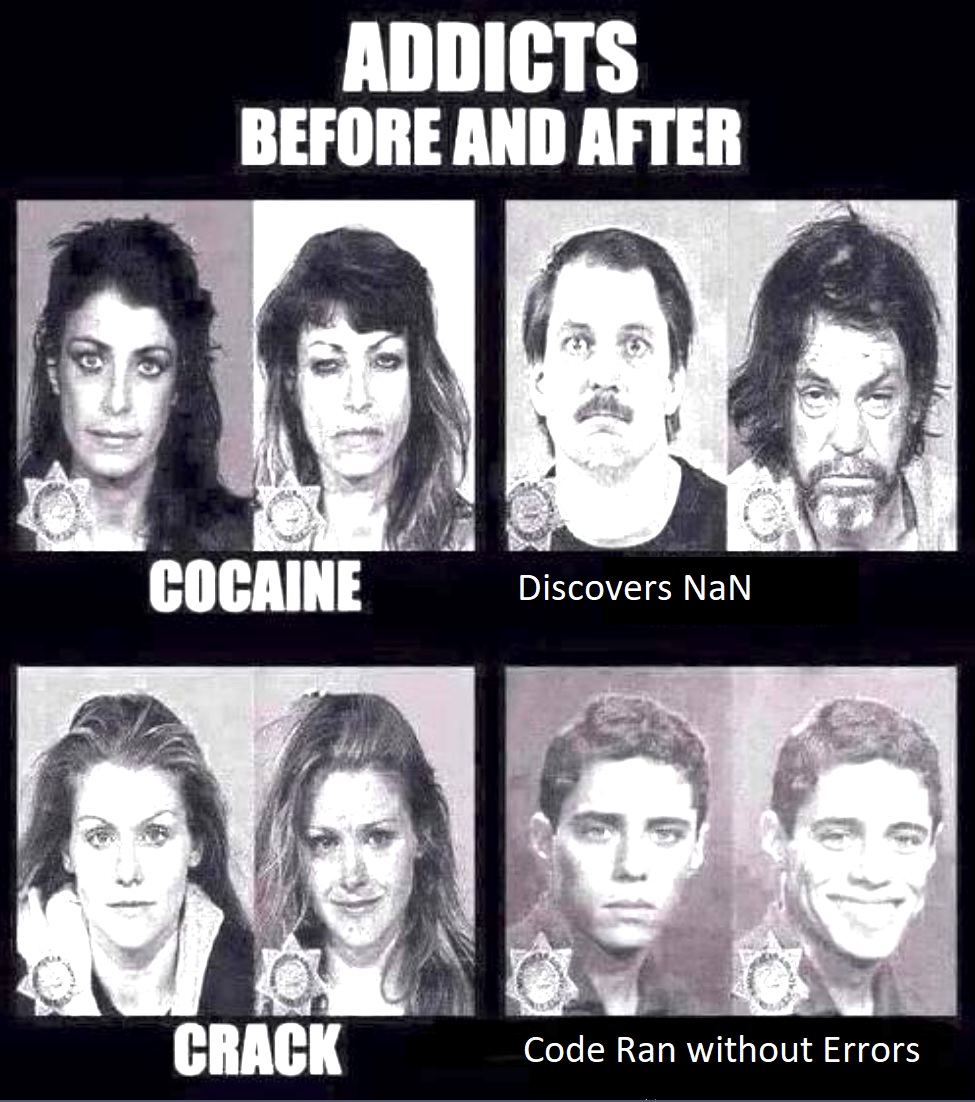

In [139]:
# sum all null values in columns to determine where values are missing.
df_drug_use.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [140]:
# Taking a look at the Correlation Matrix of the Drug Use dataframe

drug_correlation = df_drug_use.corr(method='pearson')
drug_correlation

age         n  alcohol-use  alcohol-frequency  \
age                      1.000000  0.296561     0.367742           0.642166   
n                        0.296561  1.000000     0.310512           0.313431   
alcohol-use              0.367742  0.310512     1.000000           0.897889   
alcohol-frequency        0.642166  0.313431     0.897889           1.000000   
marijuana-use           -0.380299 -0.169007     0.594165           0.260219   
marijuana-frequency      0.311873  0.135597     0.920425           0.818769   
cocaine-use             -0.186837 -0.021565     0.773458           0.577601   
cocaine-frequency        0.894474  0.365386     0.254042           0.391981   
crack-use                0.148656  0.281797     0.877378           0.785050   
crack-frequency          0.882662  0.548114     0.202732           0.333935   
heroin-use              -0.200053  0.007798     0.677614           0.546194   
heroin-frequency         0.384826  0.615534     0.327330           0.381874   
hallucinogen-use        -0.417828 -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.140999  0.008743    -0.346643          -0.174622   
inhalant-use            -0.803968 -0.368395    -0.648248          -0.864153   
inhalant-frequency       0.199472  0.190410    -0.556707          -0.305296   
pain-releiver-use       -0.438547 -0.083587     0.617523           0.280704   
pain-releiver-frequency  0.156154 -0.112076    -0.263721           0.007087   
oxycontin-use           -0.388914 -0.166039     0.589219           0.251554   
oxycontin-frequency     -0.034585 -0.024438    -0.052126           0.119852   
tranquilizer-use        -0.254427 -0.071086     0.735785           0.448543   
tranquilizer-frequency  -0.312268 -0.102301    -0.550501          -0.415026   
stimulant-use           -0.407329 -0.201621     0.582241           0.291766   
stimulant-frequency      0.703686 -0.114792    -0.028115           0.260304   
meth-use                -0.268959 -0.063571     0.682531           0.425153   
meth-frequency           0.323933  0.485909     0.282820           0.253725   
sedative-use            -0.364657 -0.119997     0.318268           0.029867   
sedative-frequency       0.445154  0.256701     0.091251           0.201423   

                         marijuana-use  marijuana-frequency  cocaine-use  \
age                          -0.380299             0.311873    -0.186837   
n                            -0.169007             0.135597    -0.021565   
alcohol-use                   0.594165             0.920425     0.773458   
alcohol-frequency             0.260219             0.818769     0.577601   
marijuana-use                 1.000000             0.615610     0.883789   
marijuana-frequency           0.615610             1.000000     0.742598   
cocaine-use                   0.883789             0.742598     1.000000   
cocaine-frequency            -0.273950             0.250348    -0.163922   
crack-use                     0.620670             0.892077     0.835727   
crack-frequency              -0.476095             0.113860    -0.339153   
heroin-use                    0.711613             0.631789     0.899944   
heroin-frequency             -0.047566             0.277175     0.058679   
hallucinogen-use              0.959353             0.528733     0.855668   
hallucinogen-frequency       -0.478286            -0.380430    -0.368402   
inhalant-use                  0.127336            -0.577792    -0.214609   
inhalant-frequency           -0.799094            -0.598028    -0.636591   
pain-releiver-use             0.966226             0.612254     0.906638   
pain-releiver-frequency      -0.506892            -0.285292    -0.273908   
oxycontin-use                 0.971733             0.609618     0.865626   
oxycontin-frequency          -0.323519             0.040880    -0.075193   
tranquilizer-use              0.935199             0.768339     0.920430   
tranquilizer-frequency       -0.401769            -0.591449    -0.

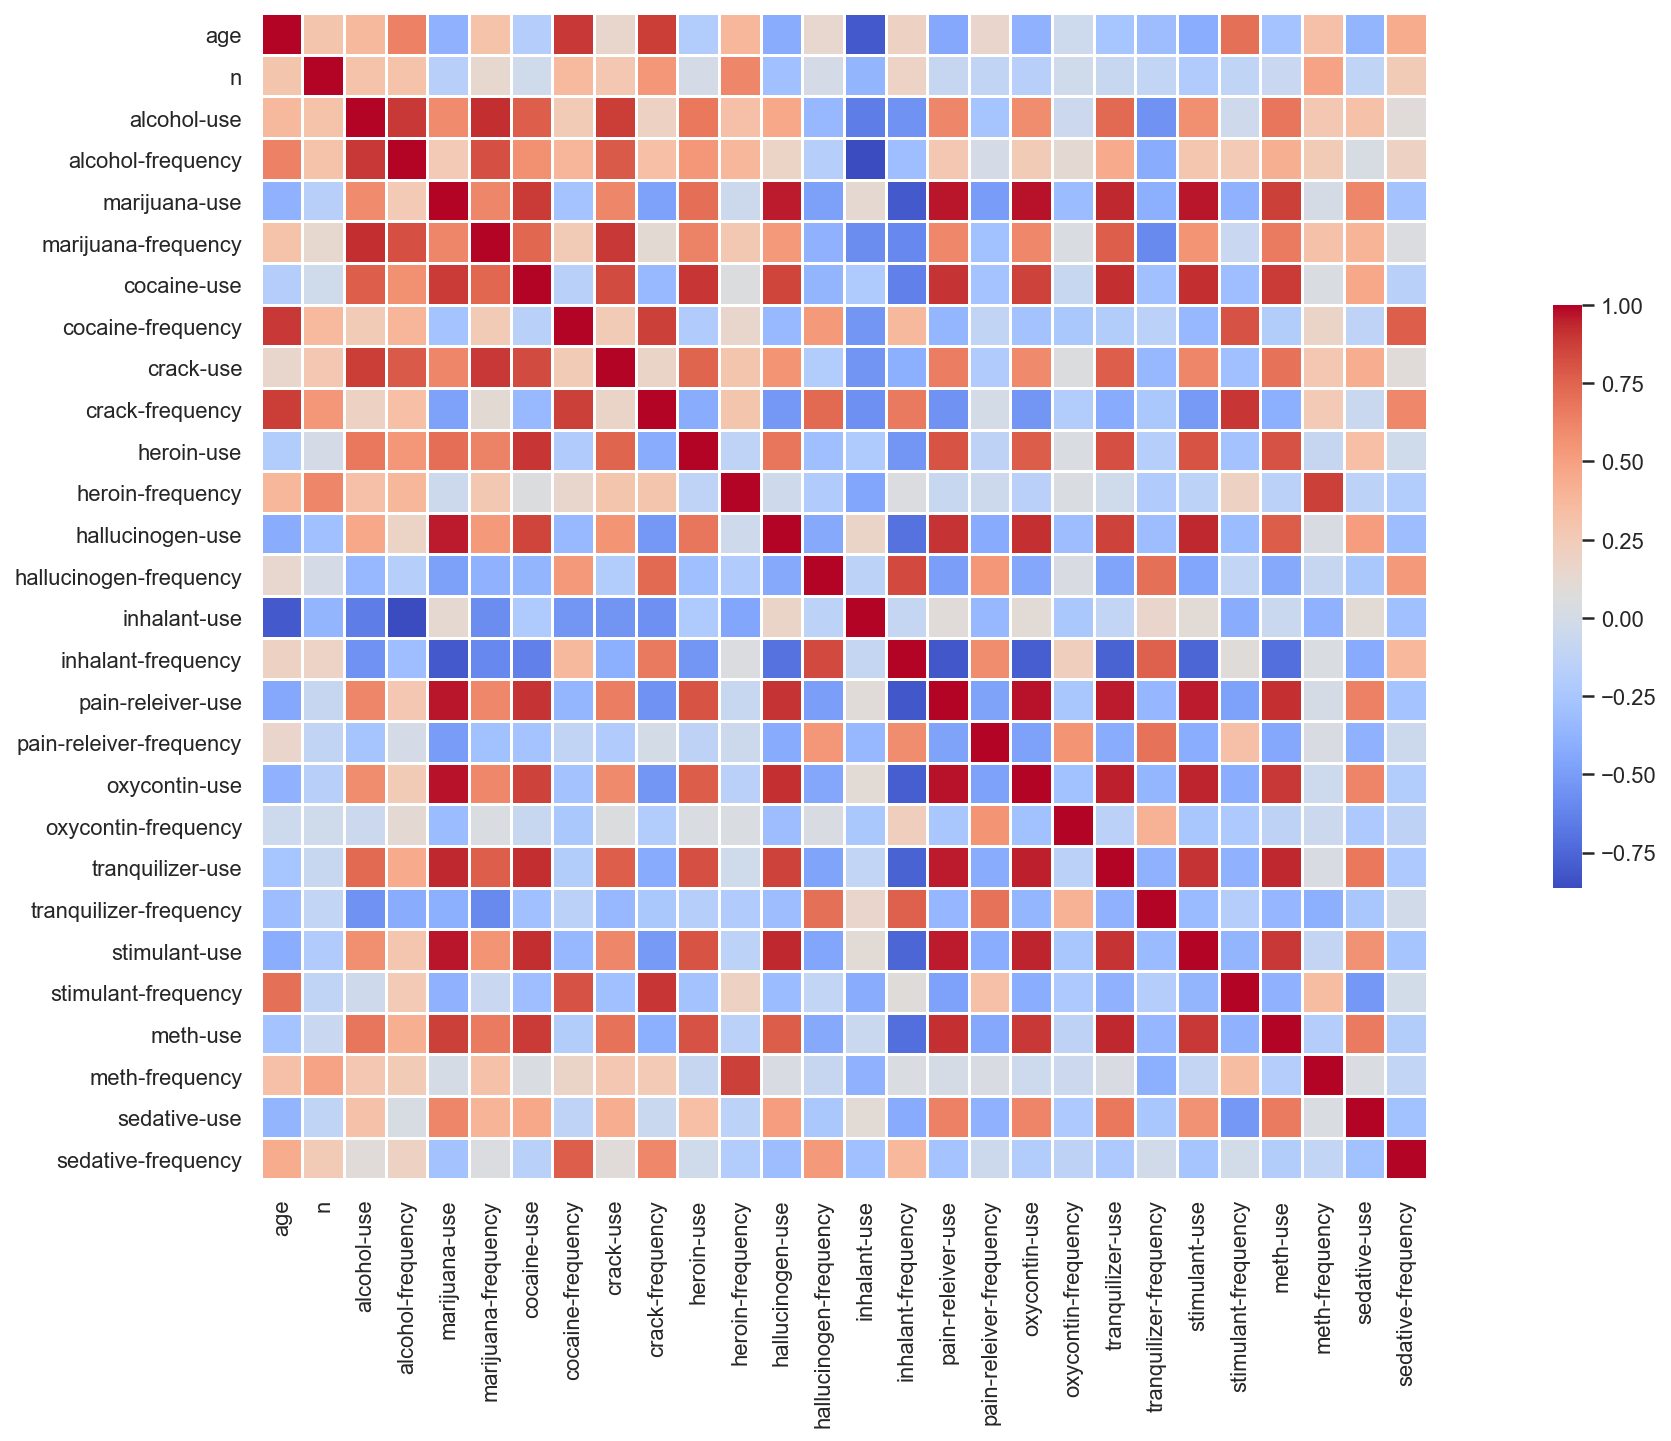

In [141]:
# showing full heatmap

ax = plt.subplots(figsize=(20, 10))

sns.heatmap(drug_correlation,
            square=True, linewidths= 1.0, cbar_kws={"shrink": .5}, cmap = 'coolwarm') 



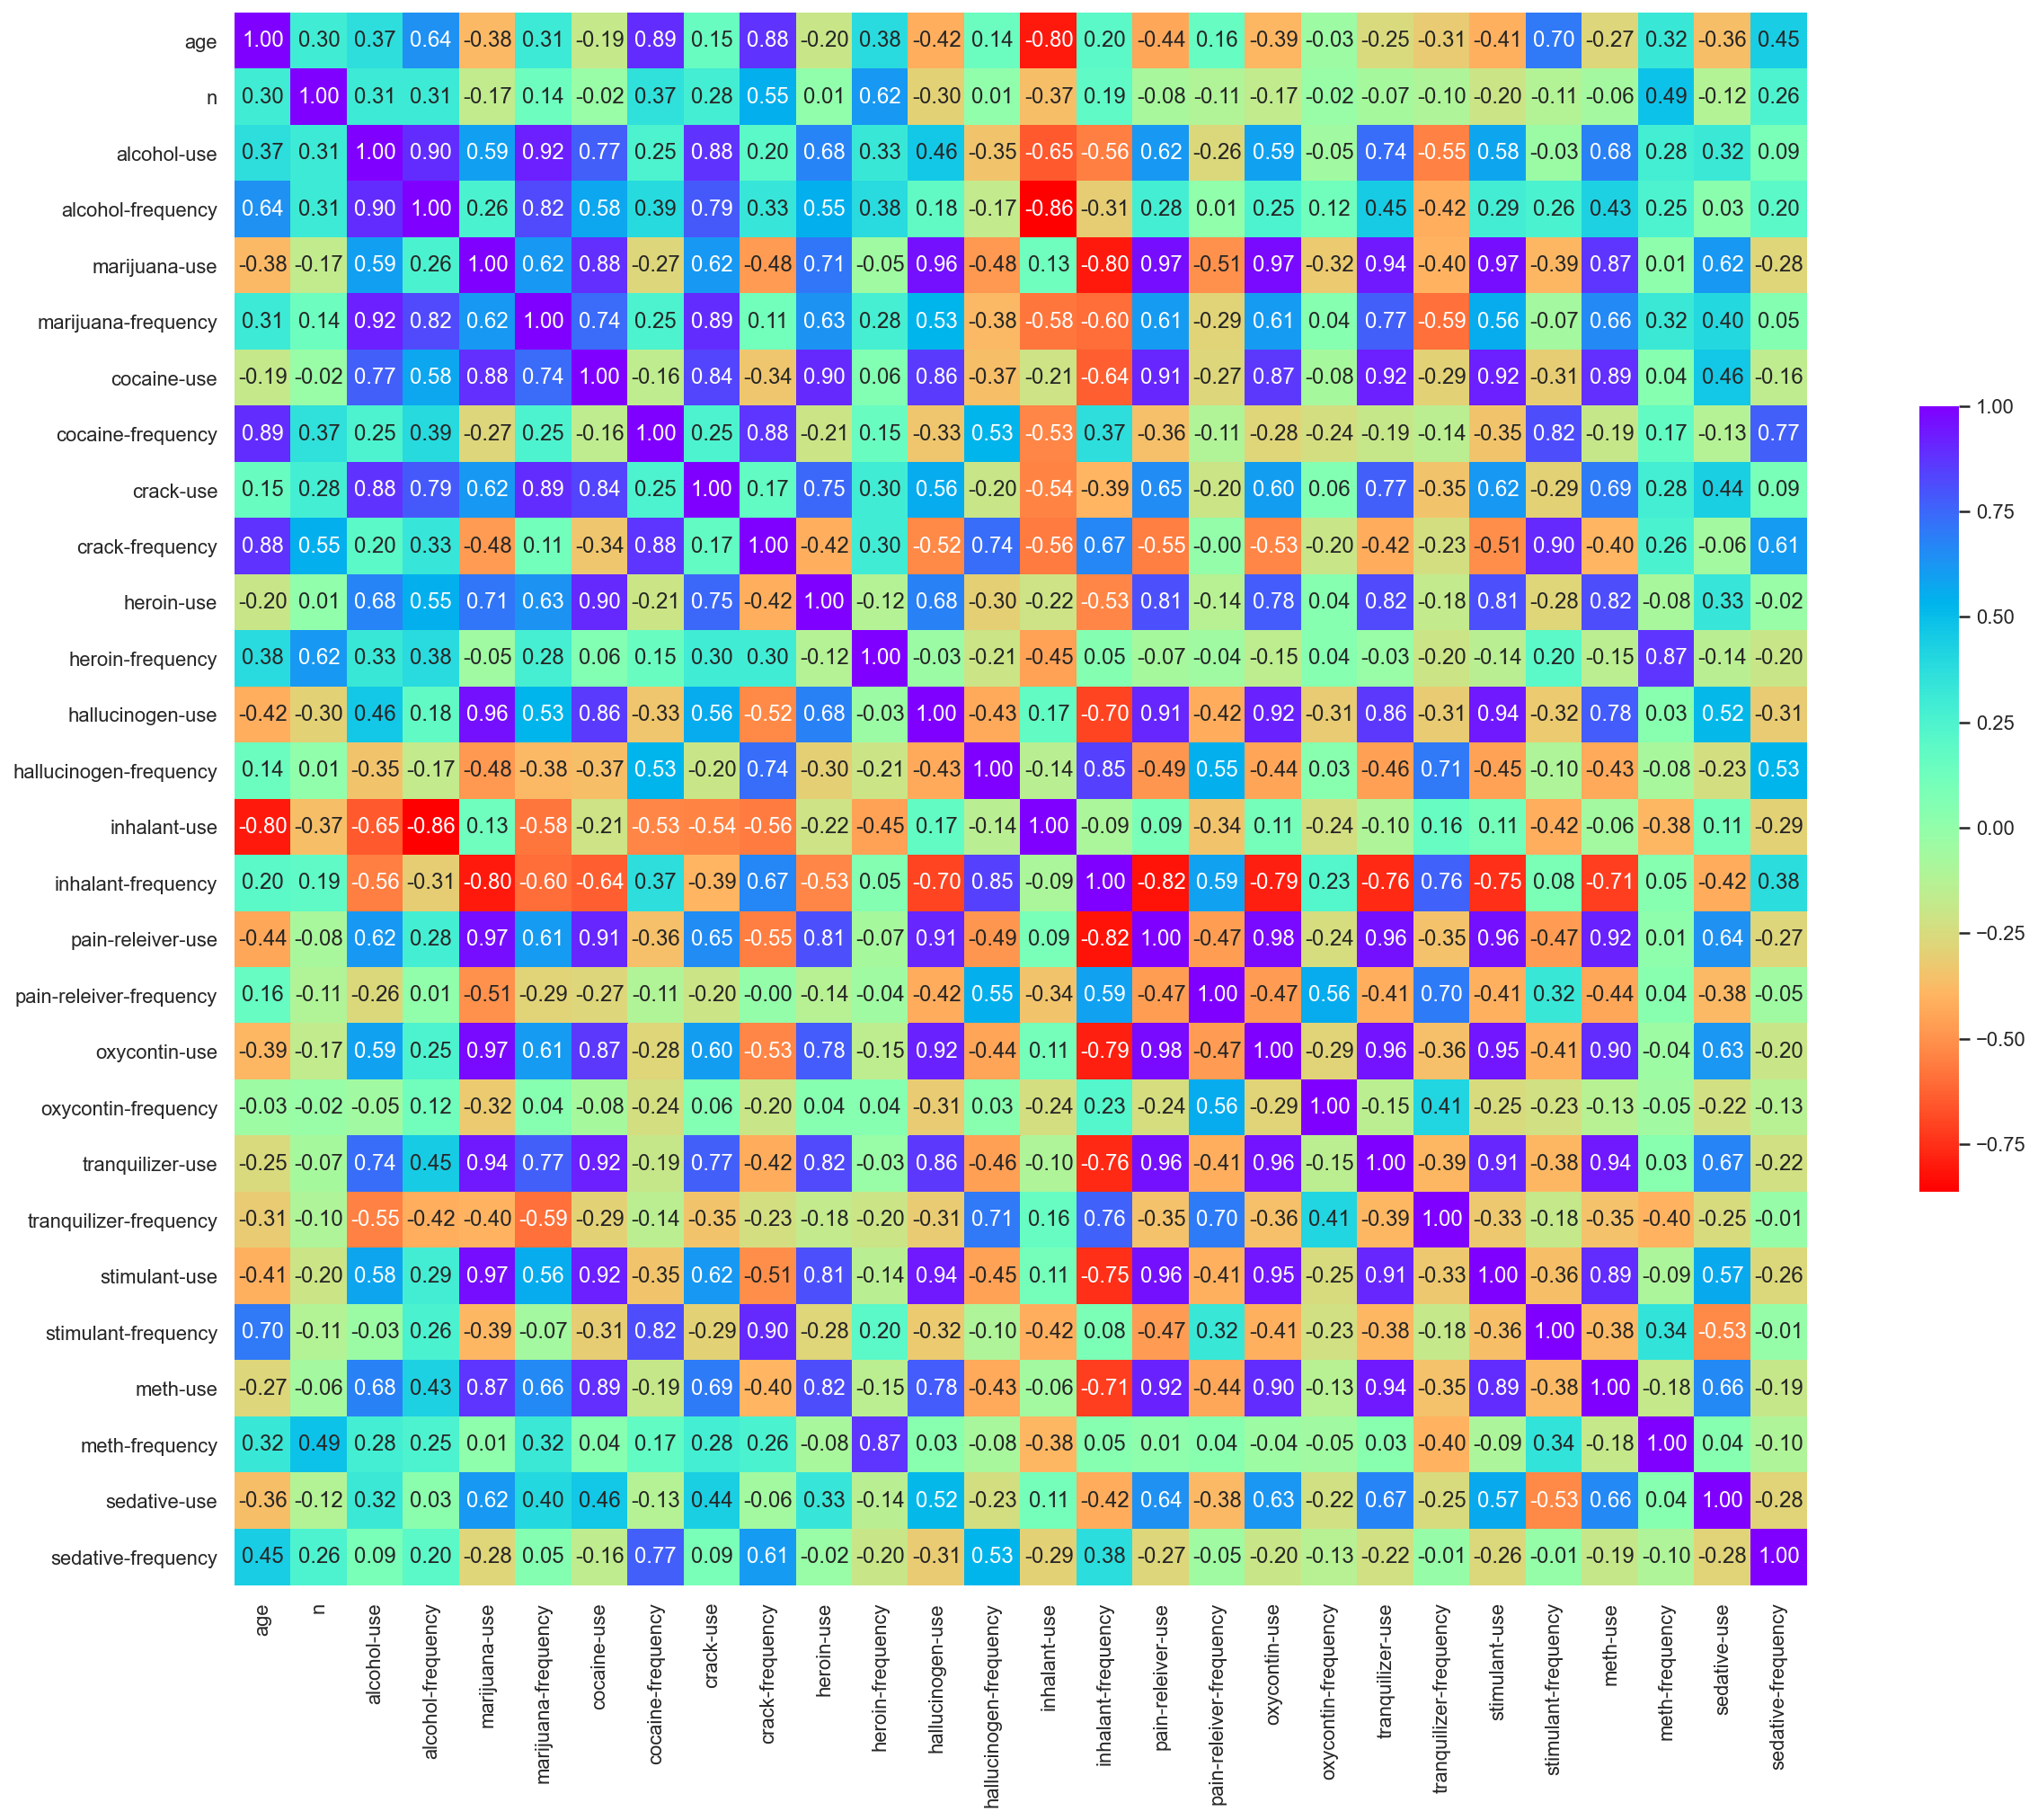

In [142]:
#  Showing the heatmap with annotations 

f, ax = plt.subplots(figsize=(20, 15))
corr = drug_correlation


# #Generate mask for upper triangle
# mask=np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

#  mask=mask,

#Visualize the correlation of all columns using heatmap
sns.heatmap(corr, fmt = '.2f', 
            square=True, annot=True, xticklabels=corr.columns, yticklabels=corr.columns, cbar_kws={"shrink": .5}, cmap = 'rainbow_r')

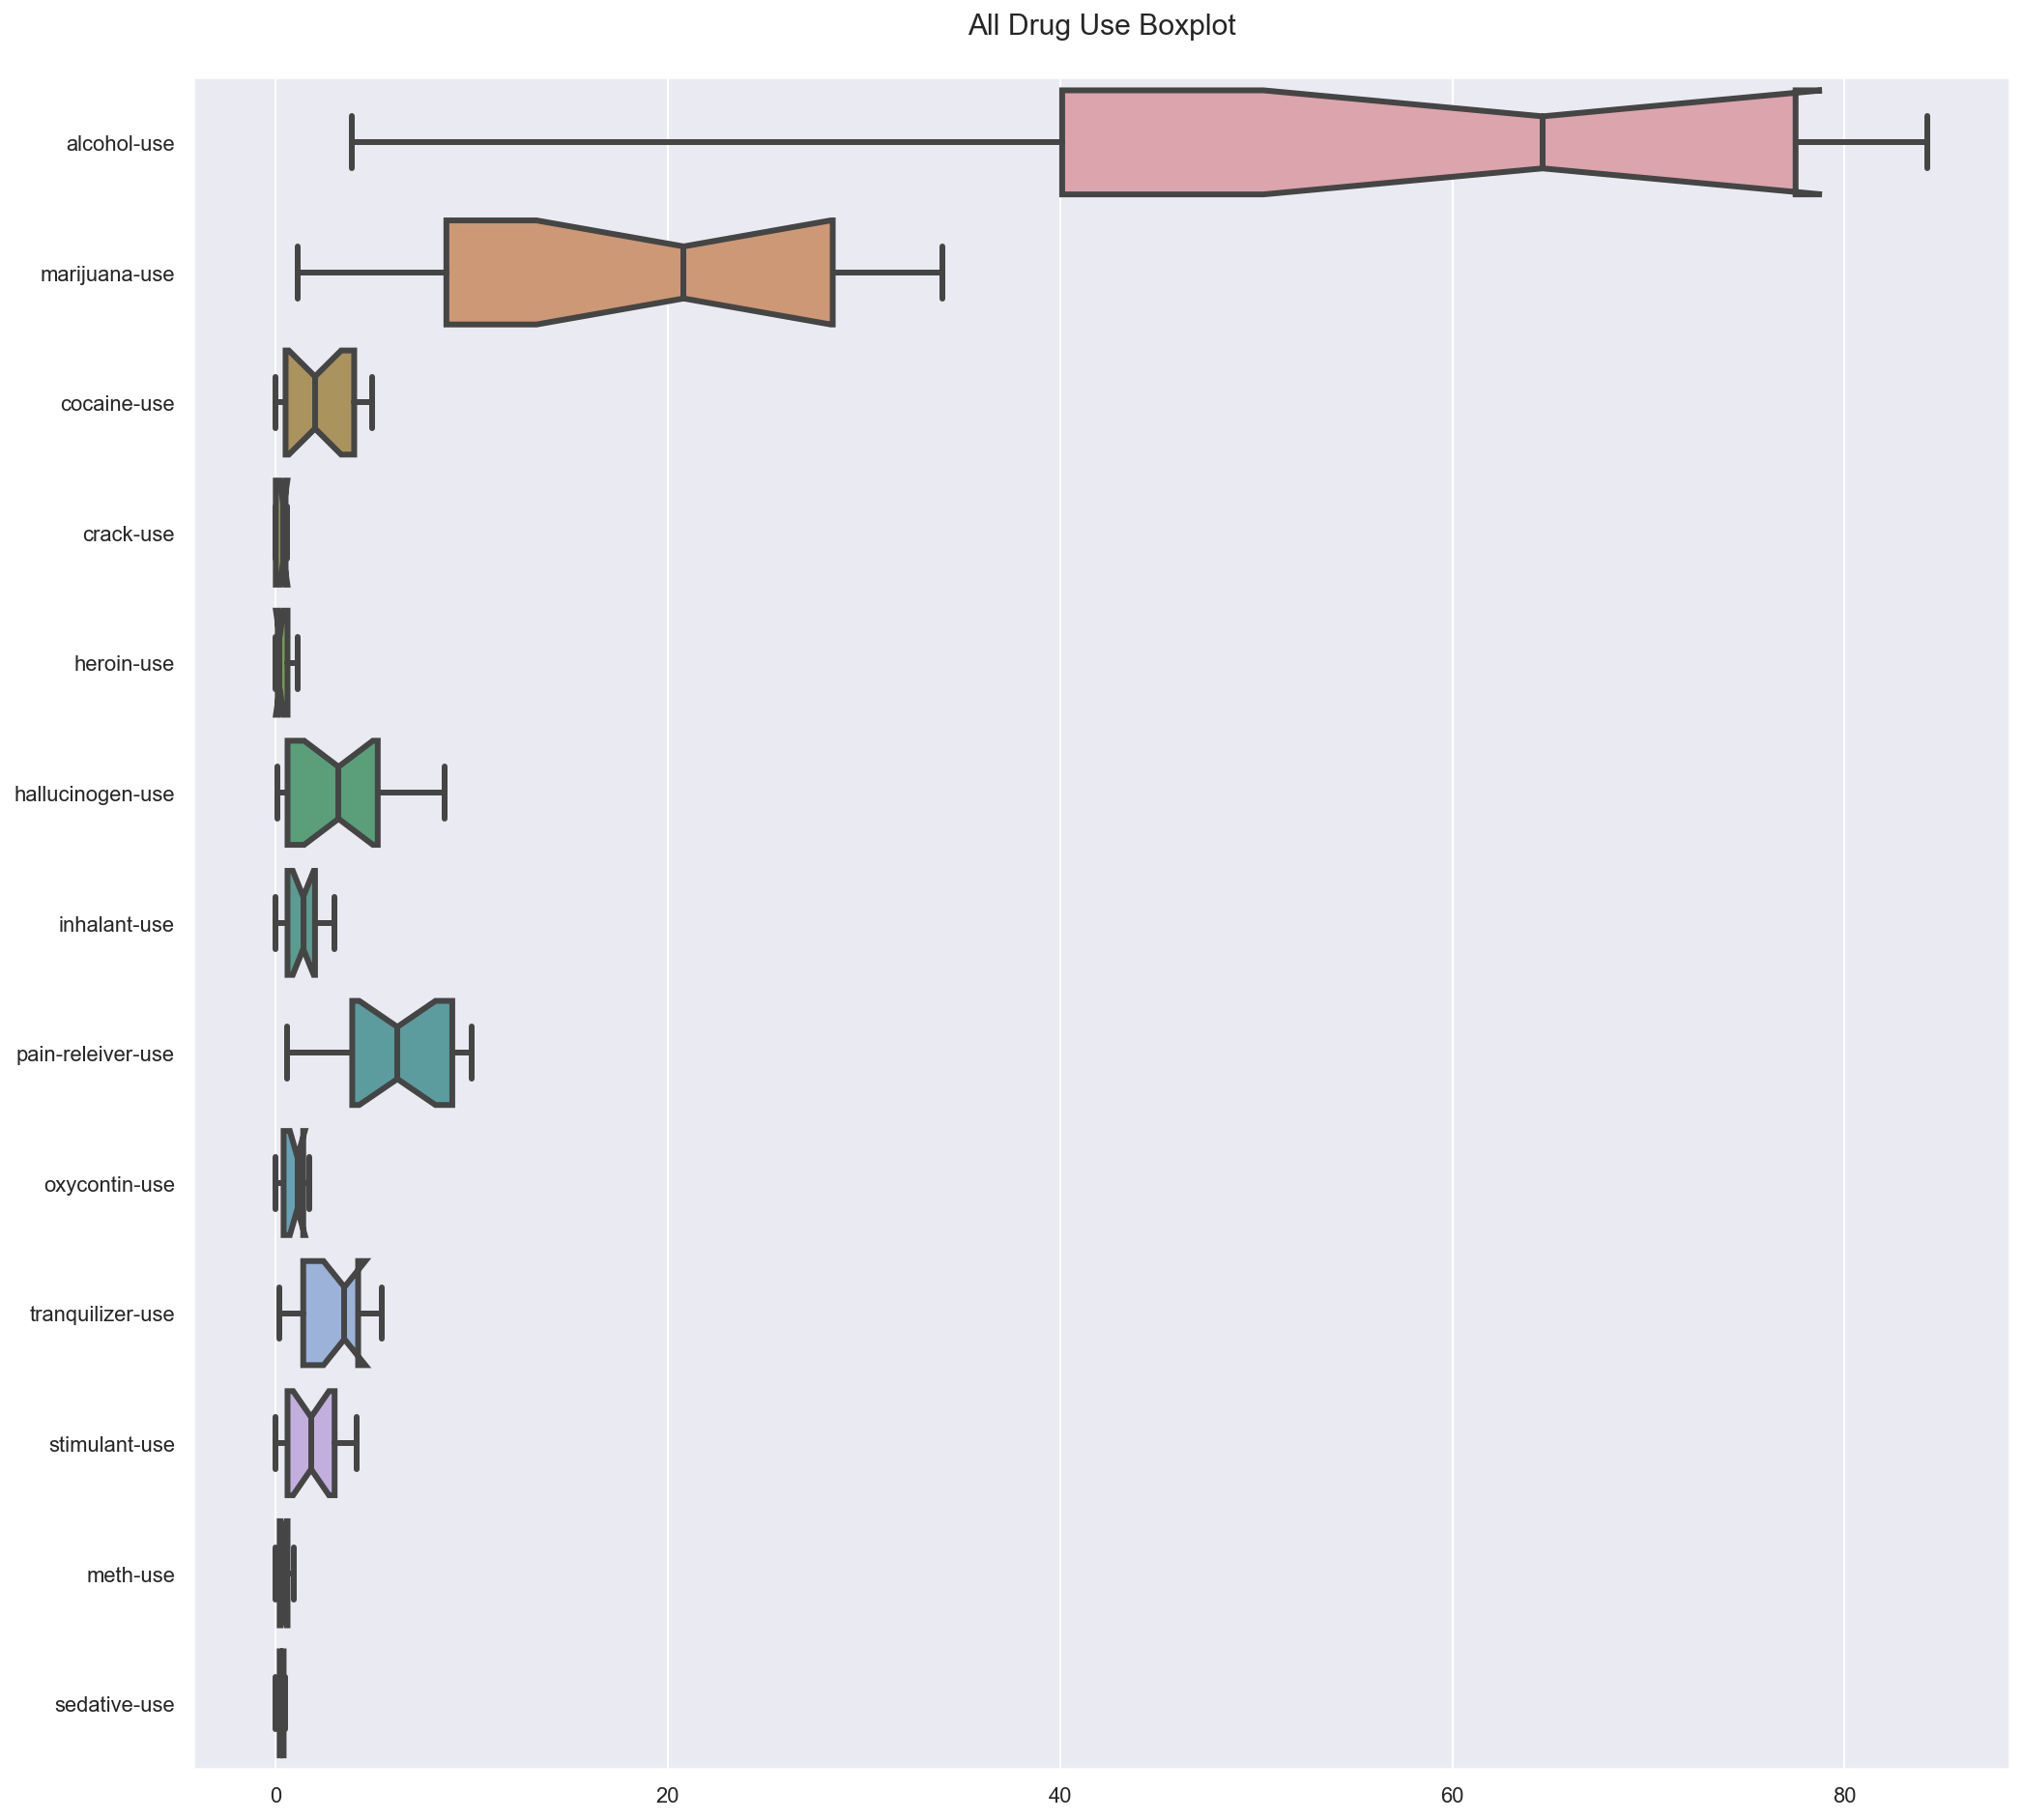

In [145]:
# Below code taken from basic eda walkthrough chapter, to show boxplot of all variables together. 
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax = sns.boxplot(data=df_drug_use.filter(like = 'use'), orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)


ax.set_title('All Drug Use Boxplot\n', size = 15)

plt.show()



We can immediately see that alchohol is the most common "drug" used. Followed by marijuana. 

In [ ]:
# Plotting all frequency variables on a box plot to show the distributions

fig = plot.figure(figsize = (15,15))
ax = fig.gca()
ax = sns.boxplot

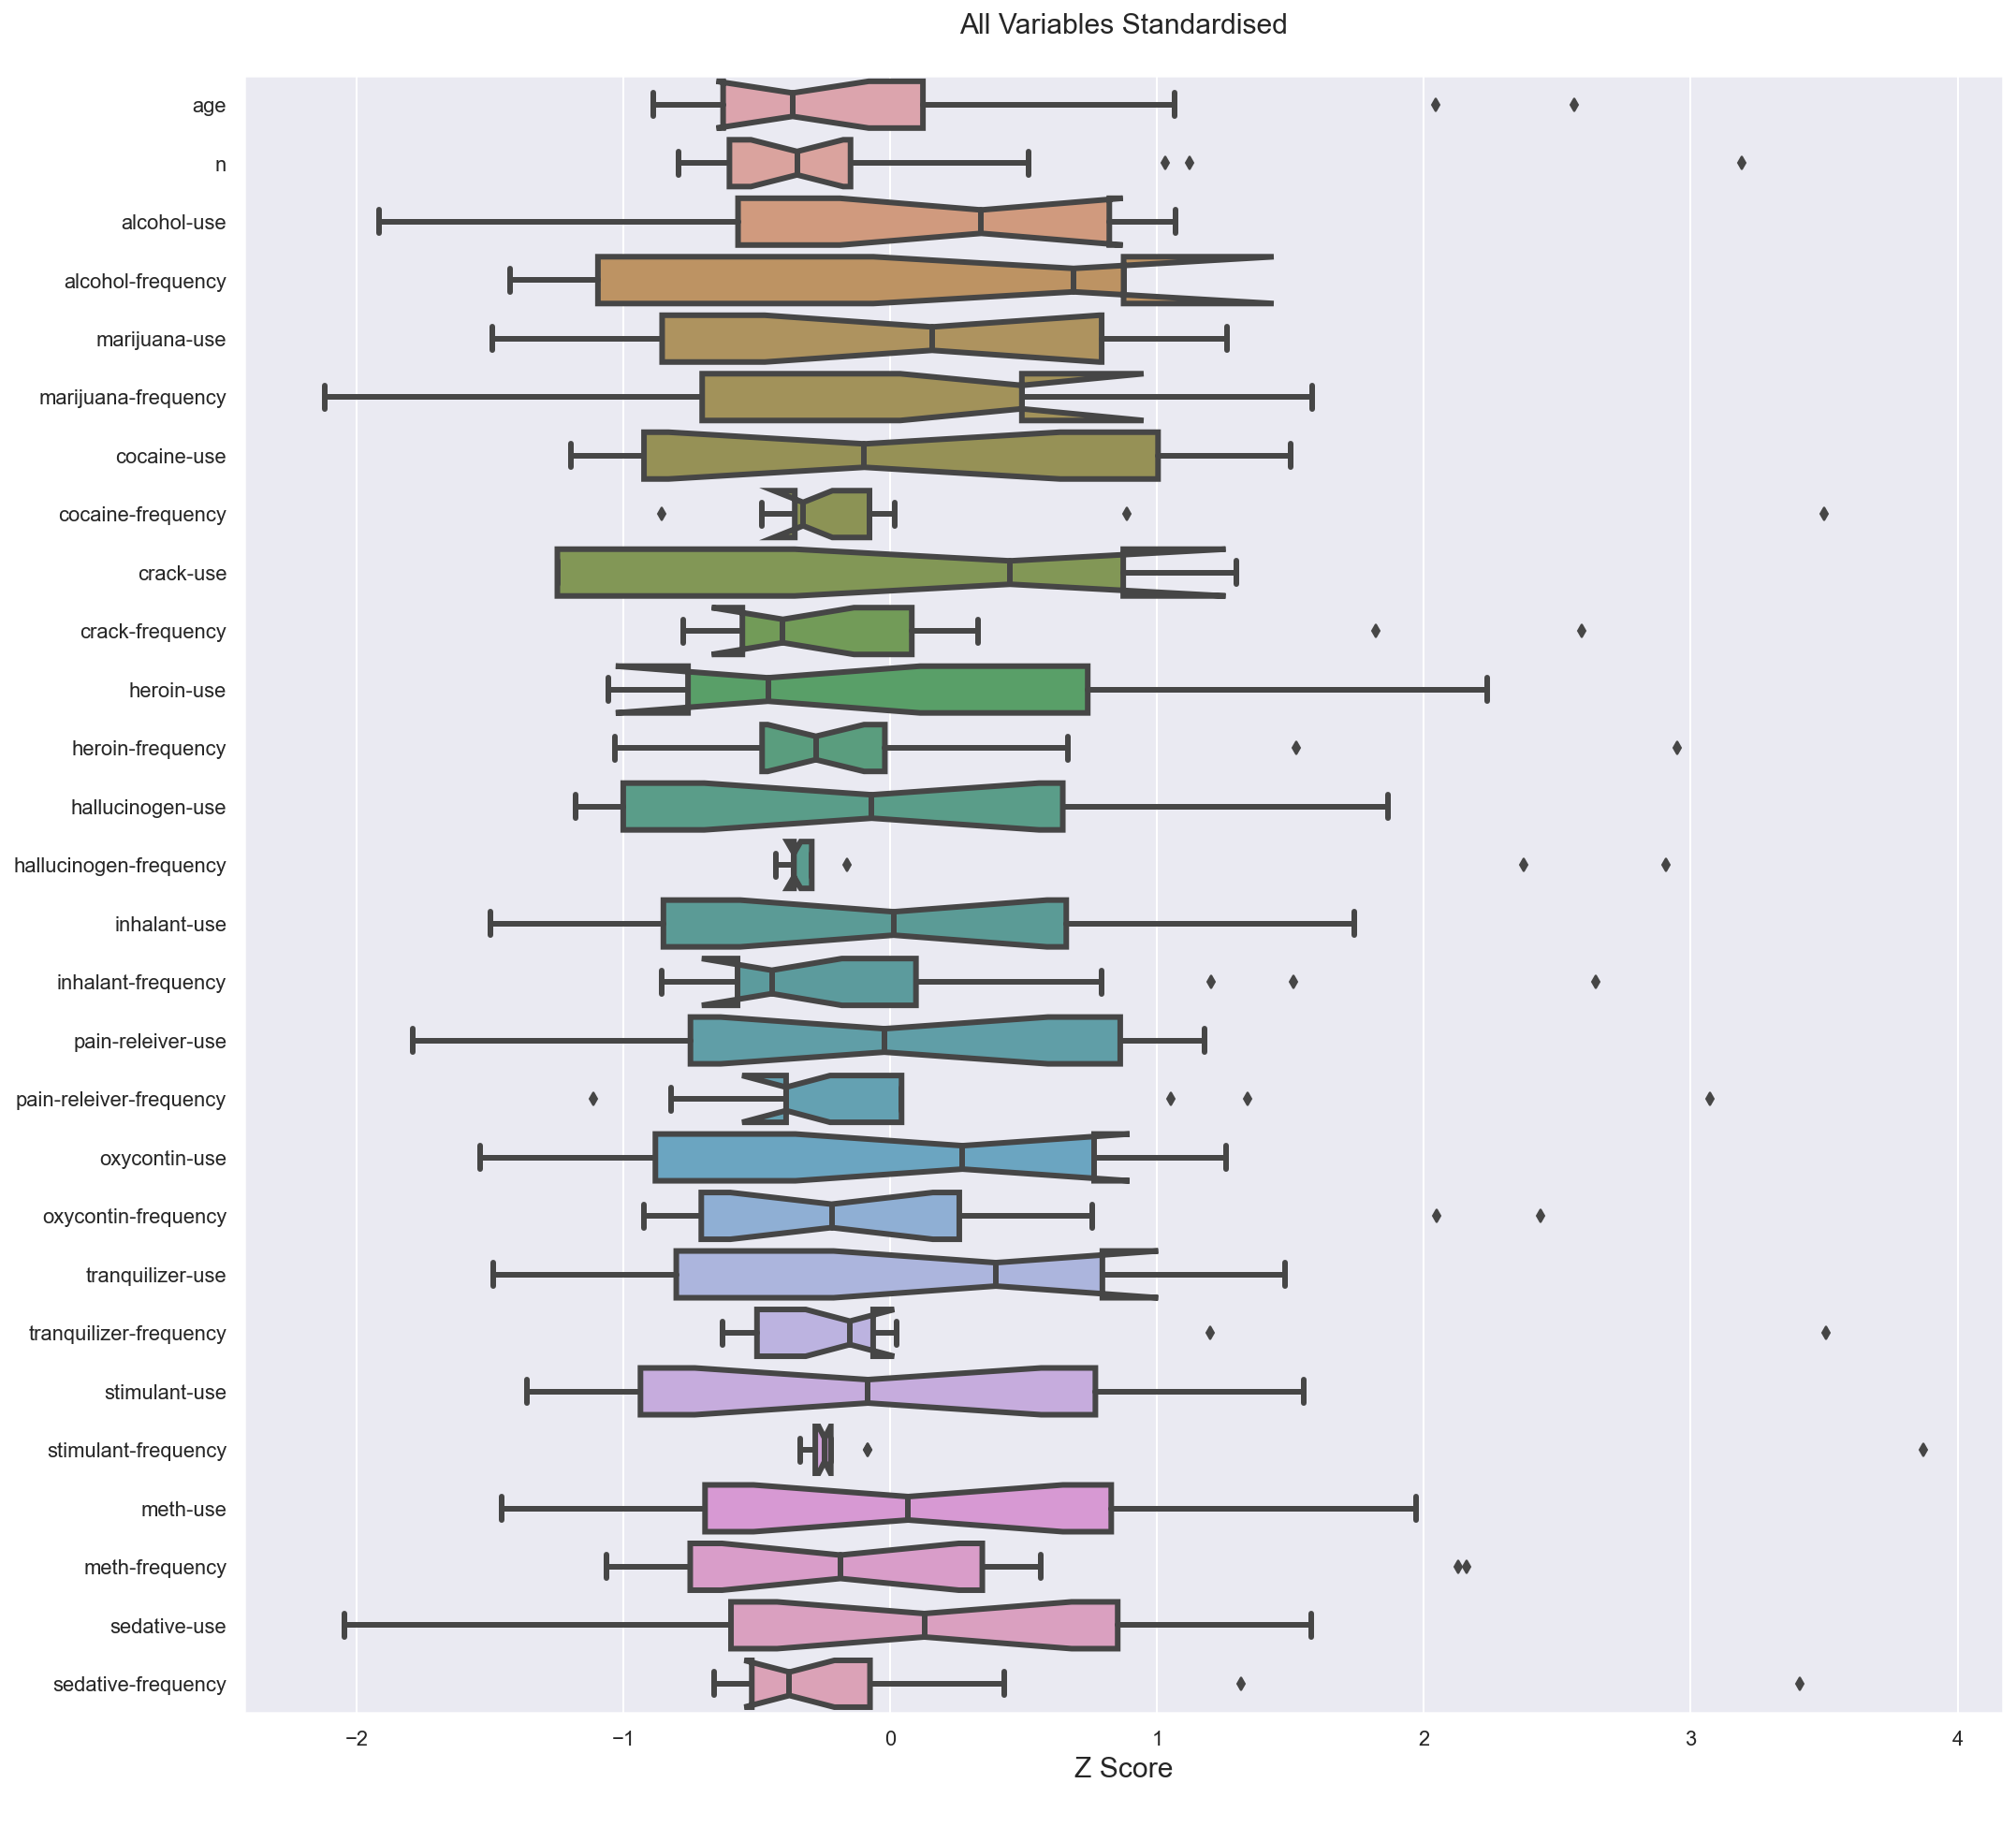

In [146]:
# Lets standardise all the variables on the Z Scale to compare apples against apples

drug_use_z = (df_drug_use - df_drug_use.mean()) / df_drug_use.std()

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax = sns.boxplot(data=drug_use_z, orient='h', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)

ax.set_title('All Variables Standardised\n', size = 15)
ax.set_xlabel('Z Score\n', size = 15)

plt.show()


As a result of plotting all variables on the Z Score we can see quite a lot of outliers. Suggesting positive skewness. 

In [ ]:
drug_age_marijuana = drug_use_pd[['age', 'marijuana-use']]

drug_age_marijuana.plot(x="age", y="marijuana-use", kind='hist', title='xz',
                legend=True, figsize=(12,10))

drug_age_marijuana.mean()

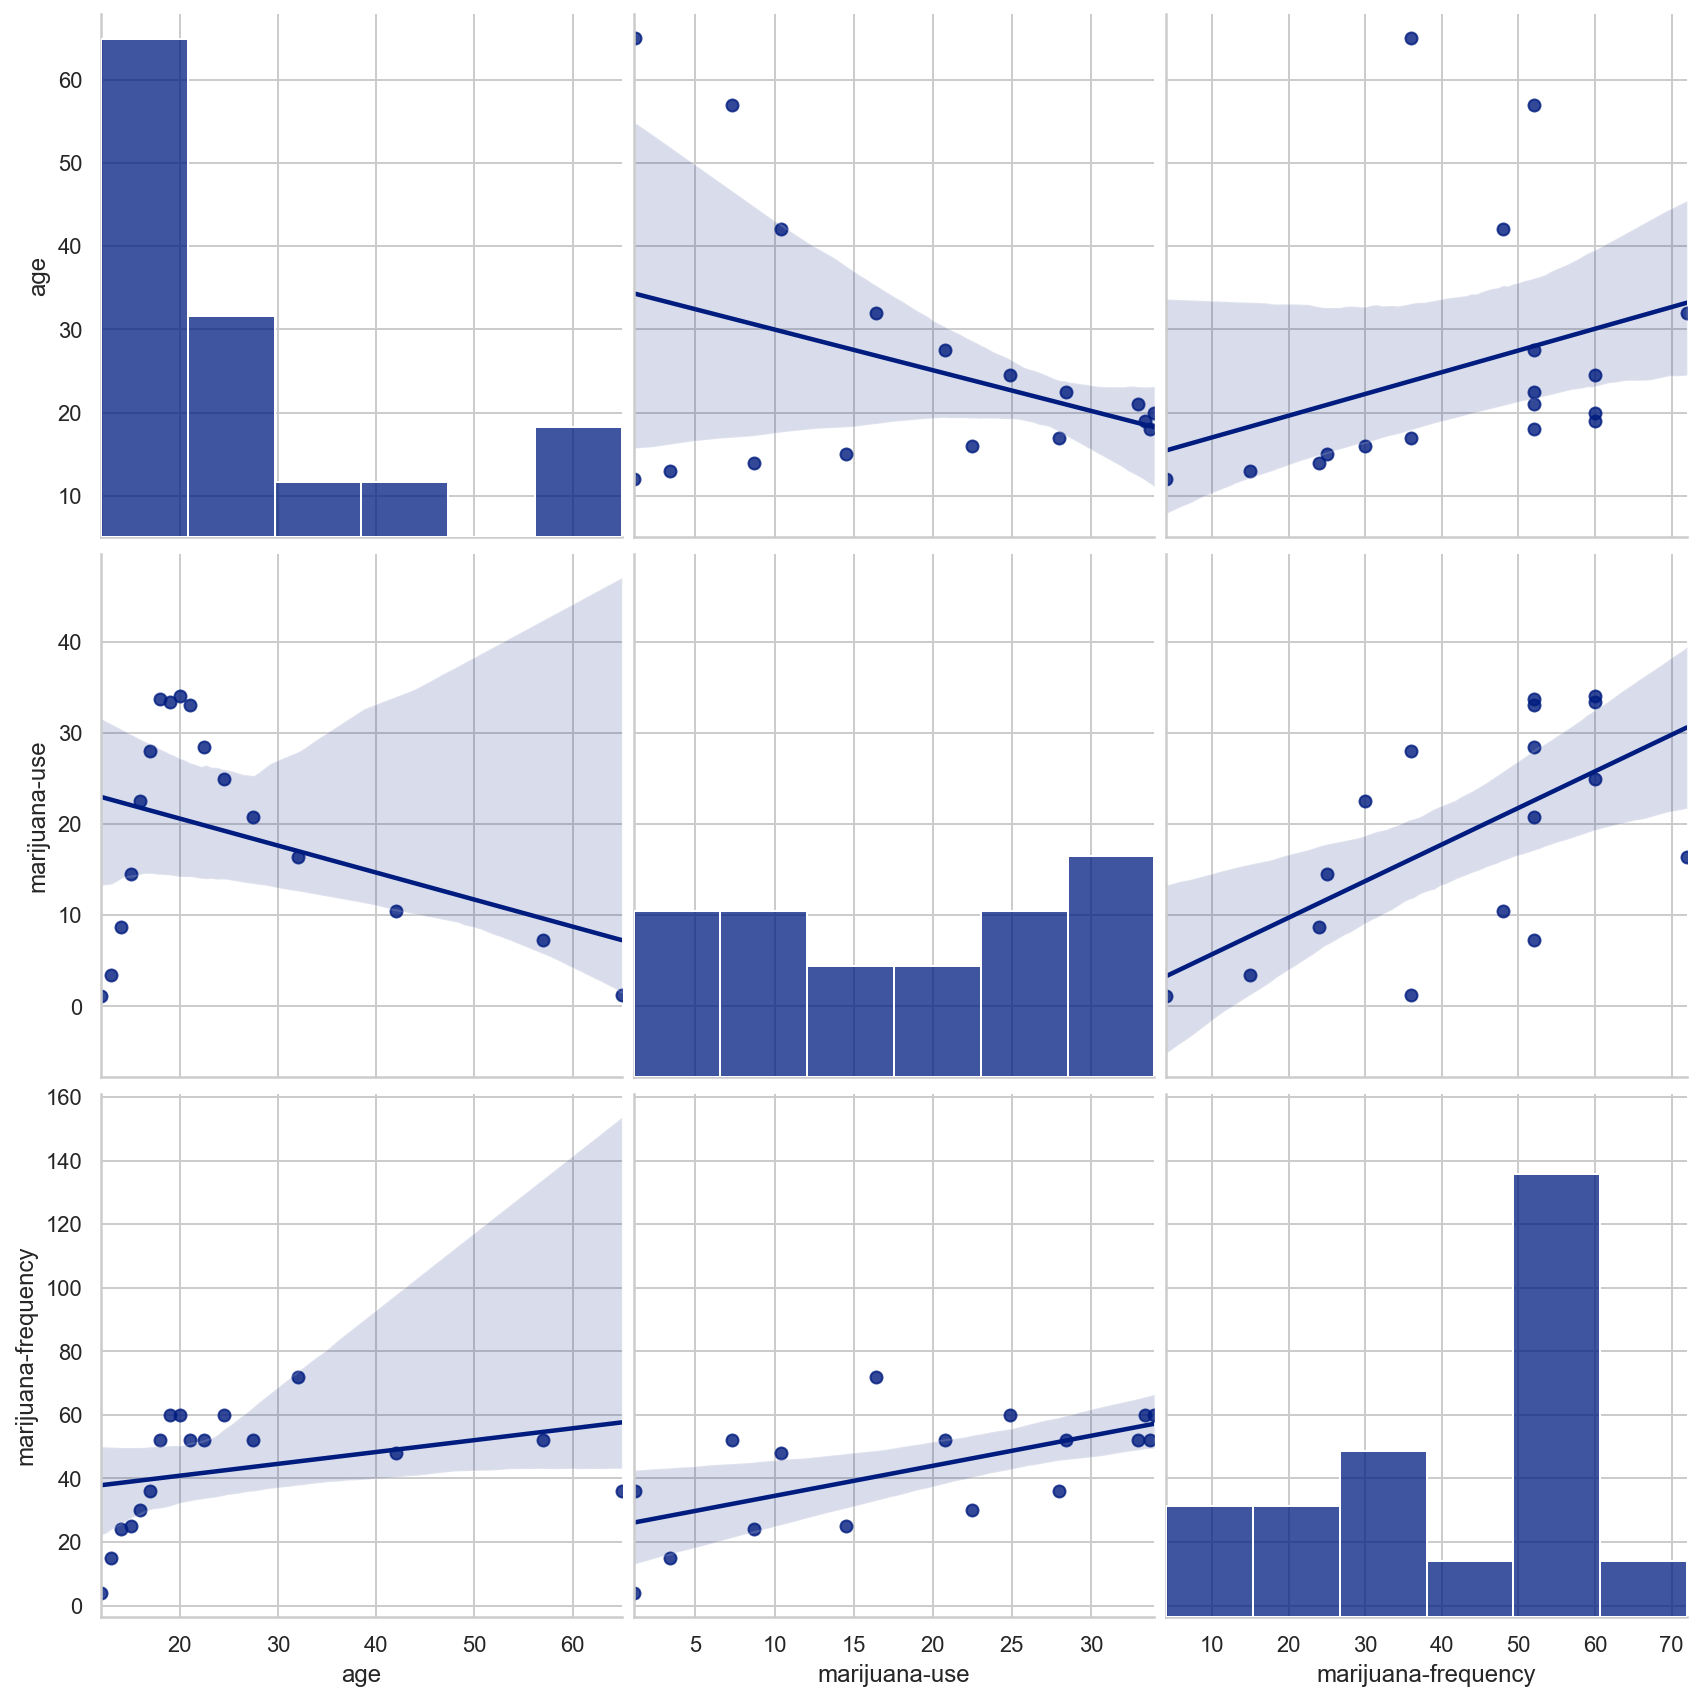

In [147]:
pairplotter(df_drug_use, ['age', 'marijuana-use', 'marijuana-frequency'])

**Number of Drug Users**

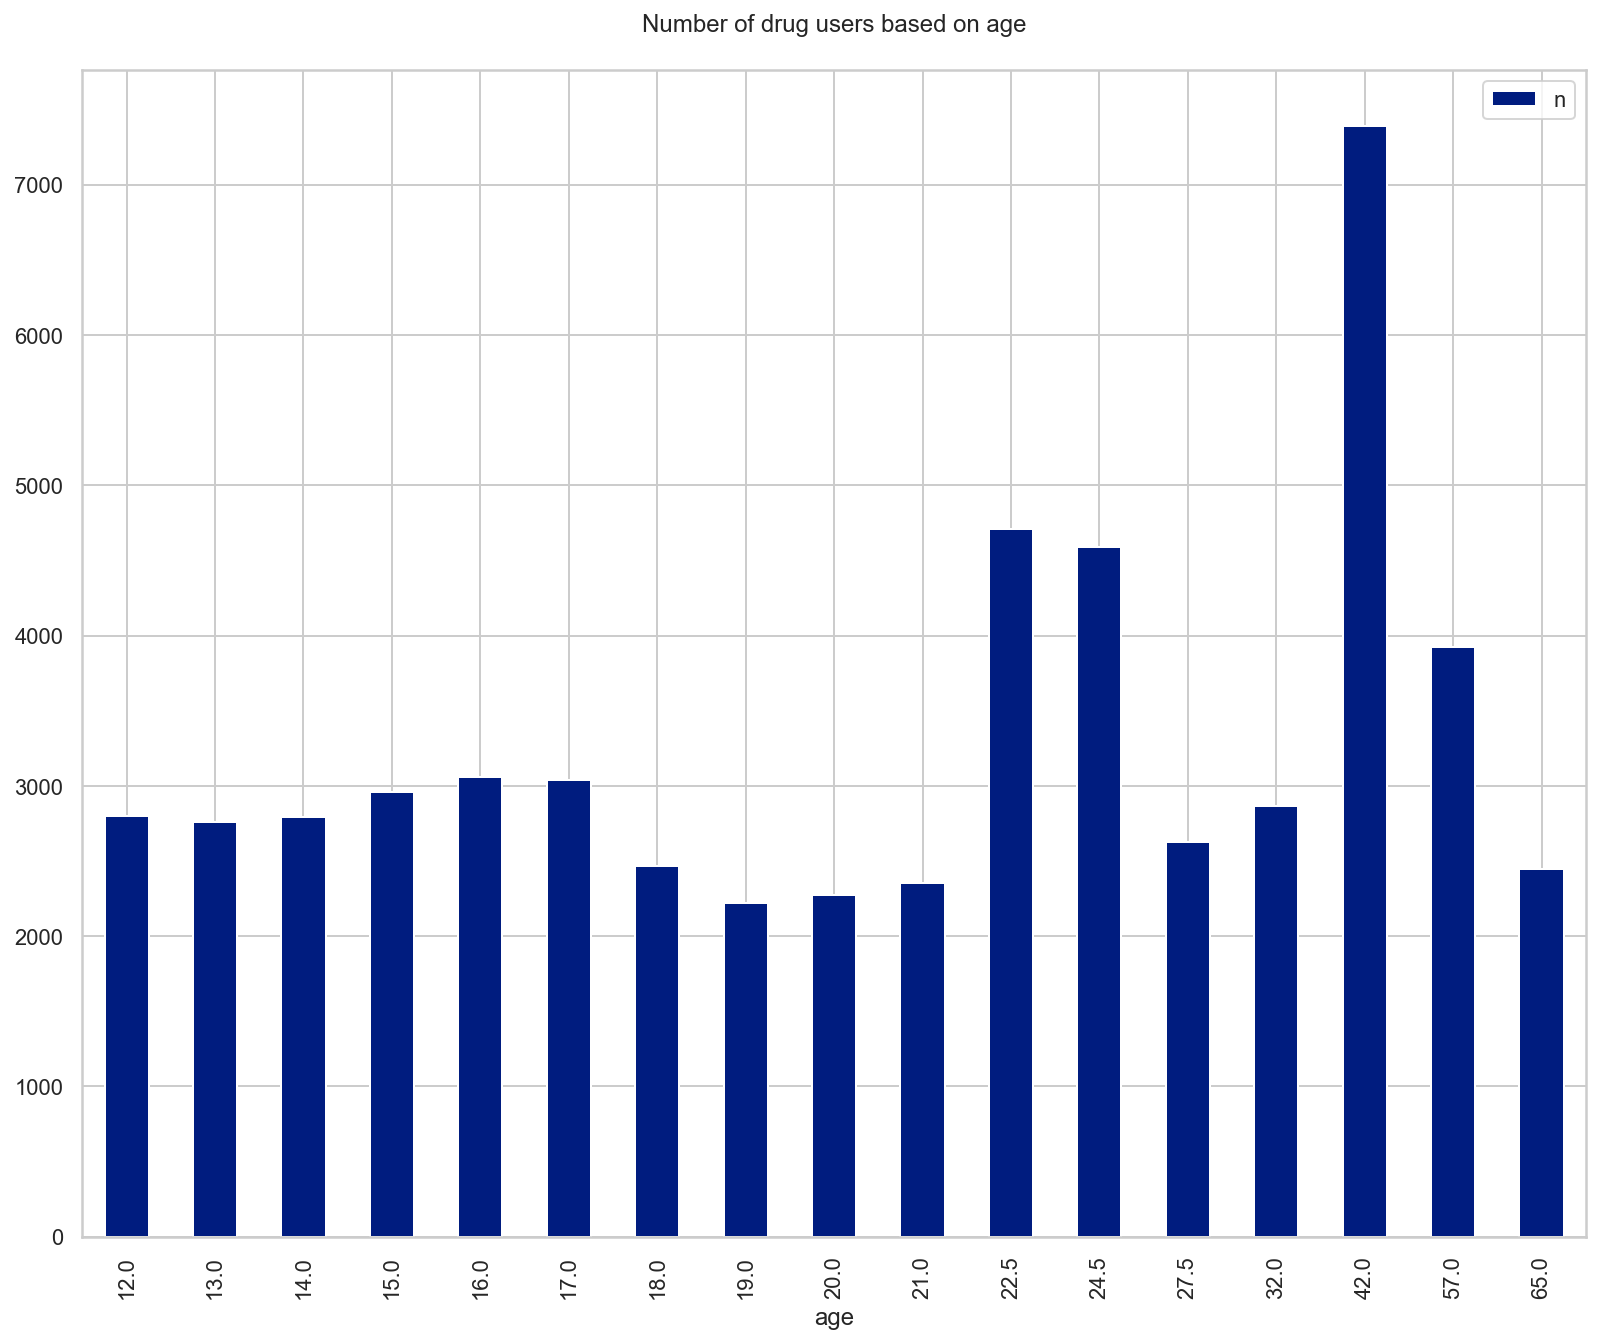

In [150]:
drug_users = df_drug_use[['age', 'n']]

drug_users.plot(x="age", y="n", kind='bar', title='Number of drug users based on age\n',
                legend=True, figsize=(12,10))


From this bar chart we can see the number of drug users based on age. Given the number says 42, that is for the age bucket previously amended which  is the 35-49 group

In [152]:
# Creating new columns in the data table for mean of users per age group and mean of frequencies by age group

df_drug_use['average_use'] = [np.mean(df_drug_use.filter(like = 'use', axis = 1).iloc[i]) for i in range(len(df_drug_use['age']))]
df_drug_use['average_frequency'] = [np.mean(df_drug_use.filter(like='frequency',axis=1).iloc[i]) for i in range(len(df_drug_use['age']))]

df_drug_use.head()

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12.0  2798.0          3.9                3.0            1.1   
1  13.0  2757.0          8.5                6.0            3.4   
2  14.0  2792.0         18.1                5.0            8.7   
3  15.0  2956.0         29.2                6.0           14.5   
4  16.0  3058.0         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency  ...  tranquilizer-use  tranquilizer-frequency  \
0              NaN  ...               0.2                    52.0   
1              3.0  ...               0.3                    25.5   
2              NaN  ...               0.9                     5.0   
3              9.5  ...               2.0                     4.5   
4              1.0  ...               2.4                    11.0   

   stimulant-use  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0            0.2                  2.0       0.0             NaN           0.2   
1            0.3                  4.0       0.1             5.0           0.1   
2            0.8                 12.0       0.1            24.0           0.2   
3            1.5                  6.0       0.3            10.5           0.4   
4            1.8                  9.5       0.3            36.0           0.2   

   sedative-frequency  average_use  average_frequency  
0                13.0     0.746154          22.363636  
1                19.0     1.415385          12.625000  
2                16.5     2.884615           9.875000  
3                30.0     4.584615           9.153846  
4                 3.0     6.315385          14.692308  

[5 rows x 30 columns]

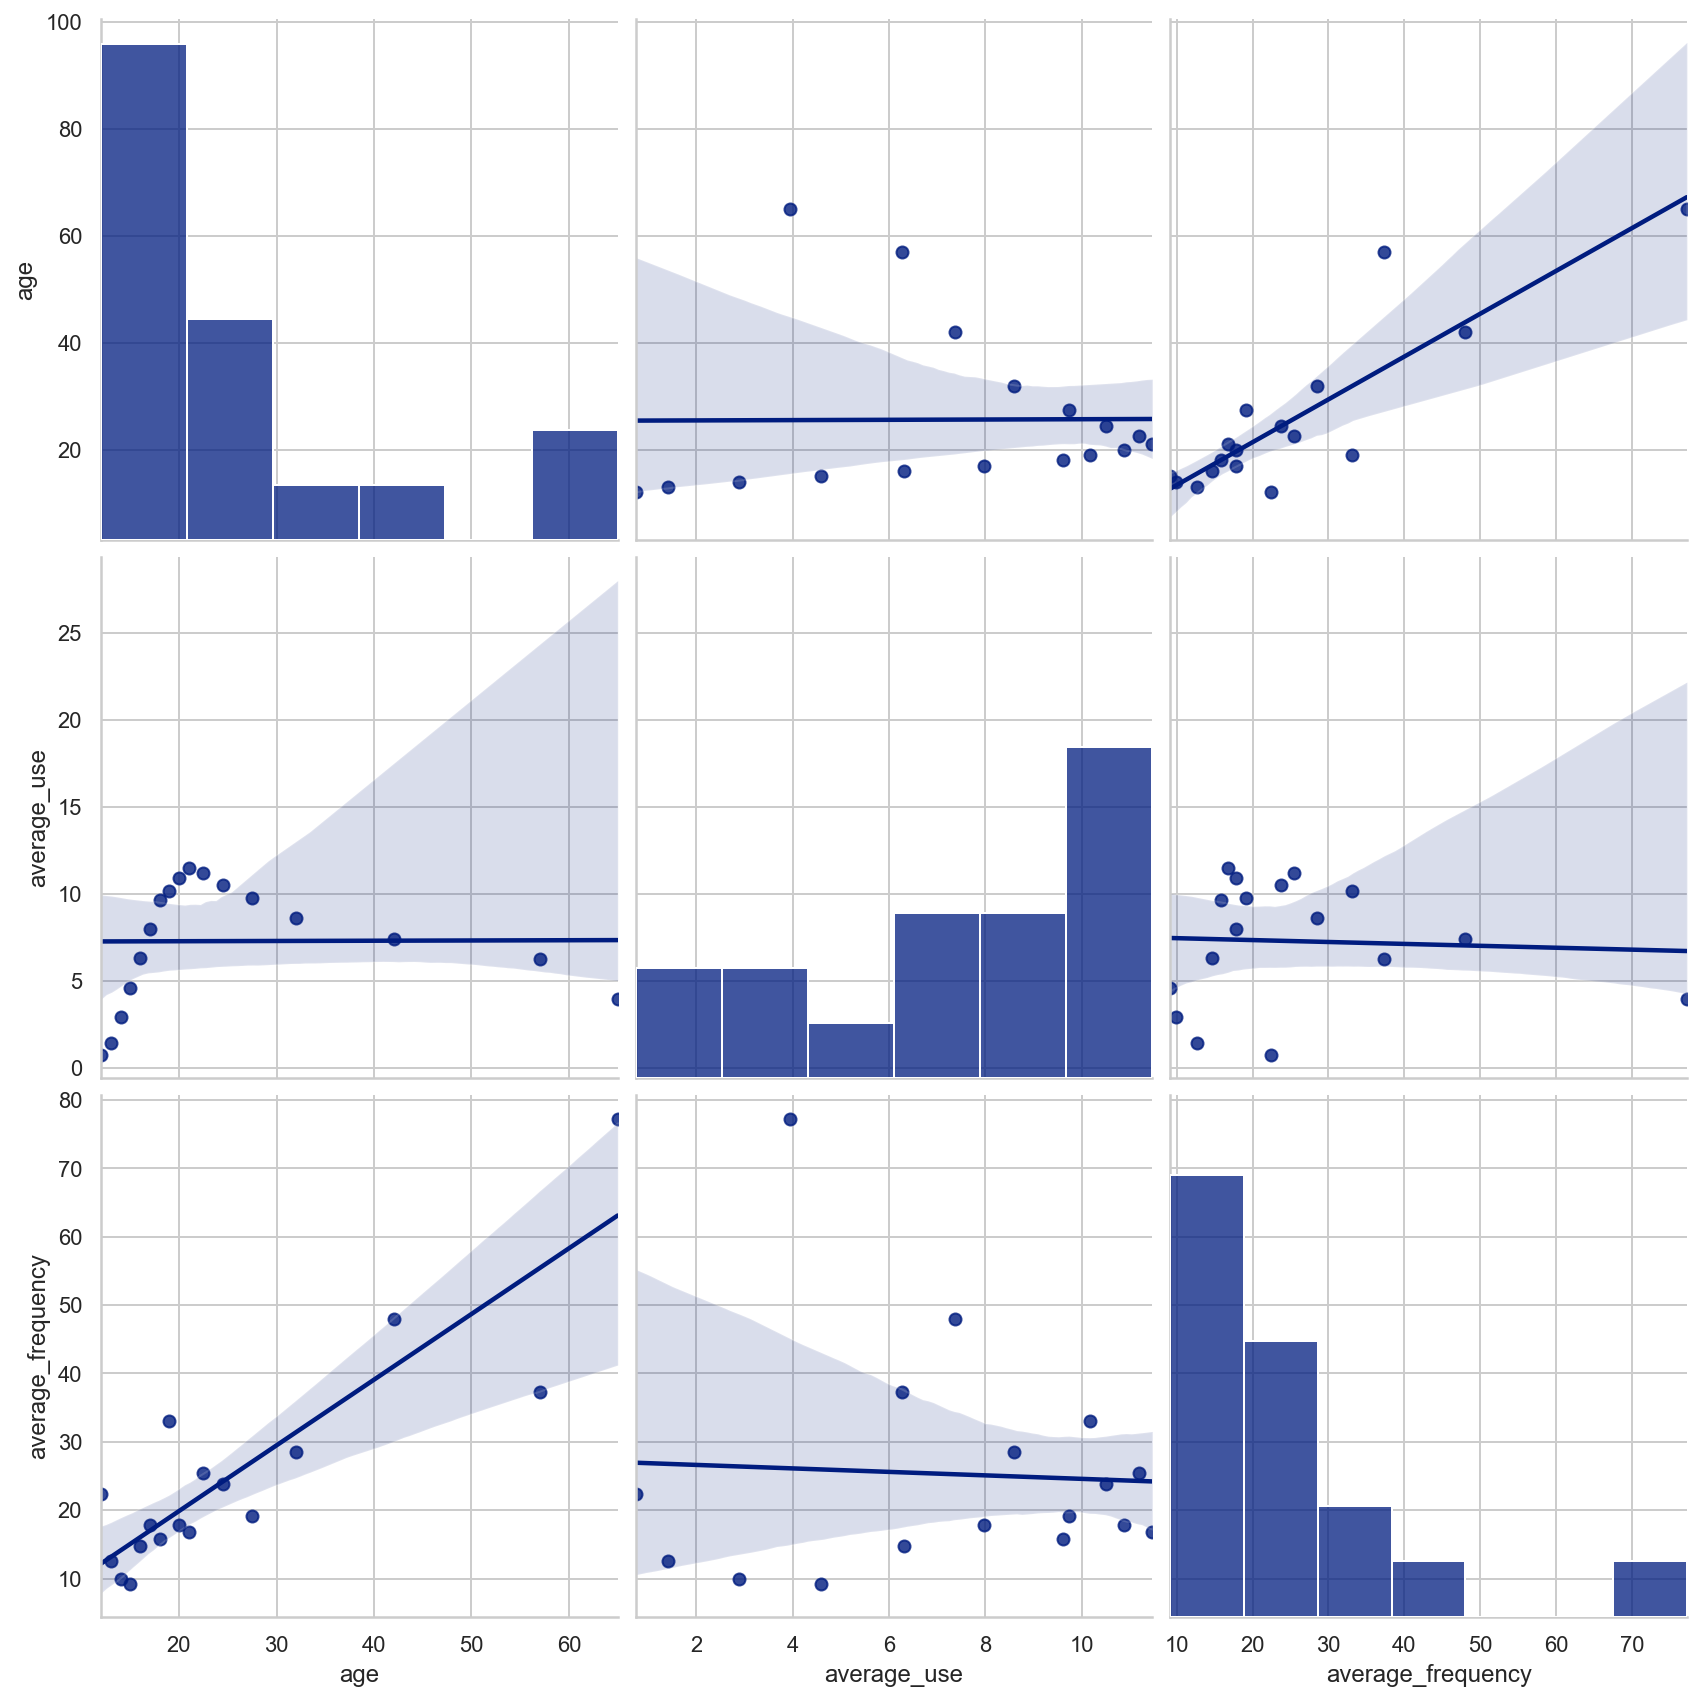

In [154]:
# Use pairplotter function to look at average use and average freq against age

pairplotter(df_drug_use, ['age', 'average_use', 'average_frequency'])

Can see that drug use increases up to age of 20 and then drops off after that. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

**Hypothesis**: 

H0: Stimulants and age do not have any correlation between each other. 
    
H1: Age and stimulants are positively correlated to each other. 


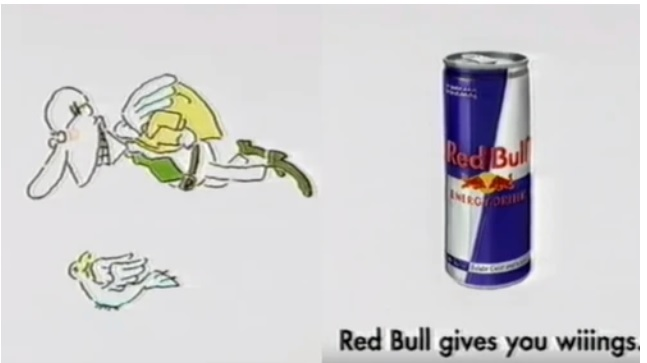

In [155]:
drug_hypo = df_drug_use[['age', 'stimulant-use', 'stimulant-frequency']]
drug_hypo

age  stimulant-use  stimulant-frequency
0   12.0            0.2                  2.0
1   13.0            0.3                  4.0
2   14.0            0.8                 12.0
3   15.0            1.5                  6.0
4   16.0            1.8                  9.5
5   17.0            2.8                  9.0
6   18.0            3.0                  8.0
7   19.0            3.3                  6.0
8   20.0            4.0                 12.0
9   21.0            4.1                 10.0
10  22.5            3.6                 10.0
11  24.5            2.6                 10.0
12  27.5            2.3                  7.0
13  32.0            1.4                 12.0
14  42.0            0.6                 24.0
15  57.0            0.3                 24.0
16  65.0            0.0                364.0

In [156]:
# Lets take a look at the Pearson Correlation between Age and Stimulants

drug_hypo_corr = drug_hypo.corr(method = 'pearson')
drug_hypo_corr

age  stimulant-use  stimulant-frequency
age                  1.000000      -0.407329             0.703686
stimulant-use       -0.407329       1.000000            -0.363358
stimulant-frequency  0.703686      -0.363358             1.000000

In [158]:
drug_hypo.mean()

age                    25.617647
stimulant-use           1.917647
stimulant-frequency    31.147059
dtype: float64

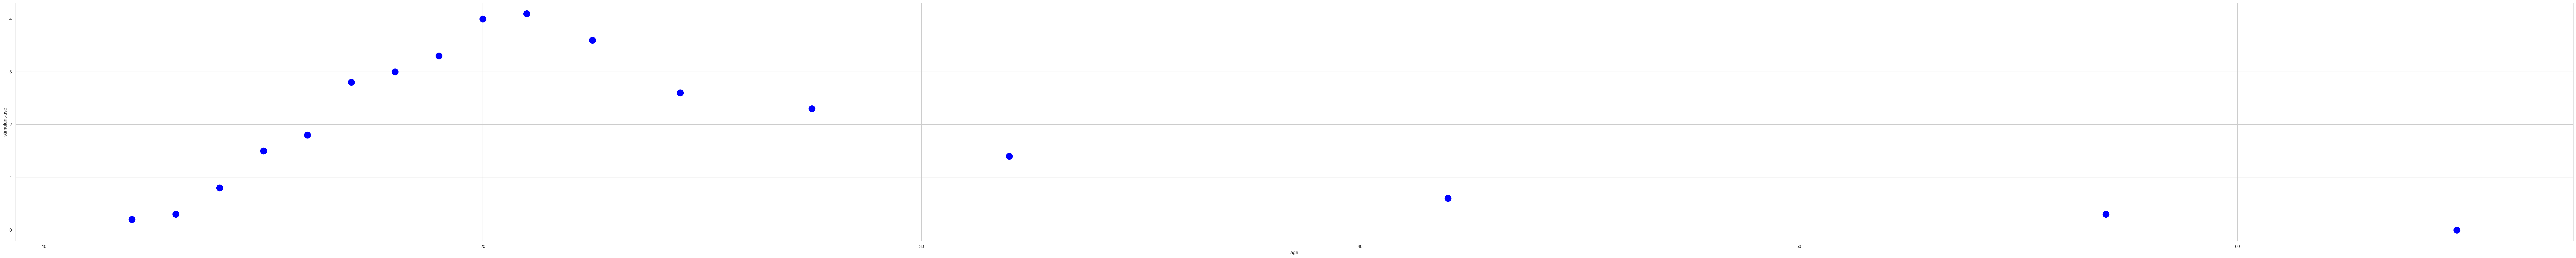

In [160]:
# Further graphical representation of a Scatter Plot showing Age against Stimulant Use

drug_hypo.plot.scatter(x = 'age', y = 'stimulant-use', s = 250, c = 'blue')

As we have an interesting looking curve, we can see that Age around the 20's shows the highest use of Stimulants and tapers off as people get older. Thus suggesting stimulants taken are prevelant amongst young people from age 10 - 20, likely due to parties and festivals etc. 

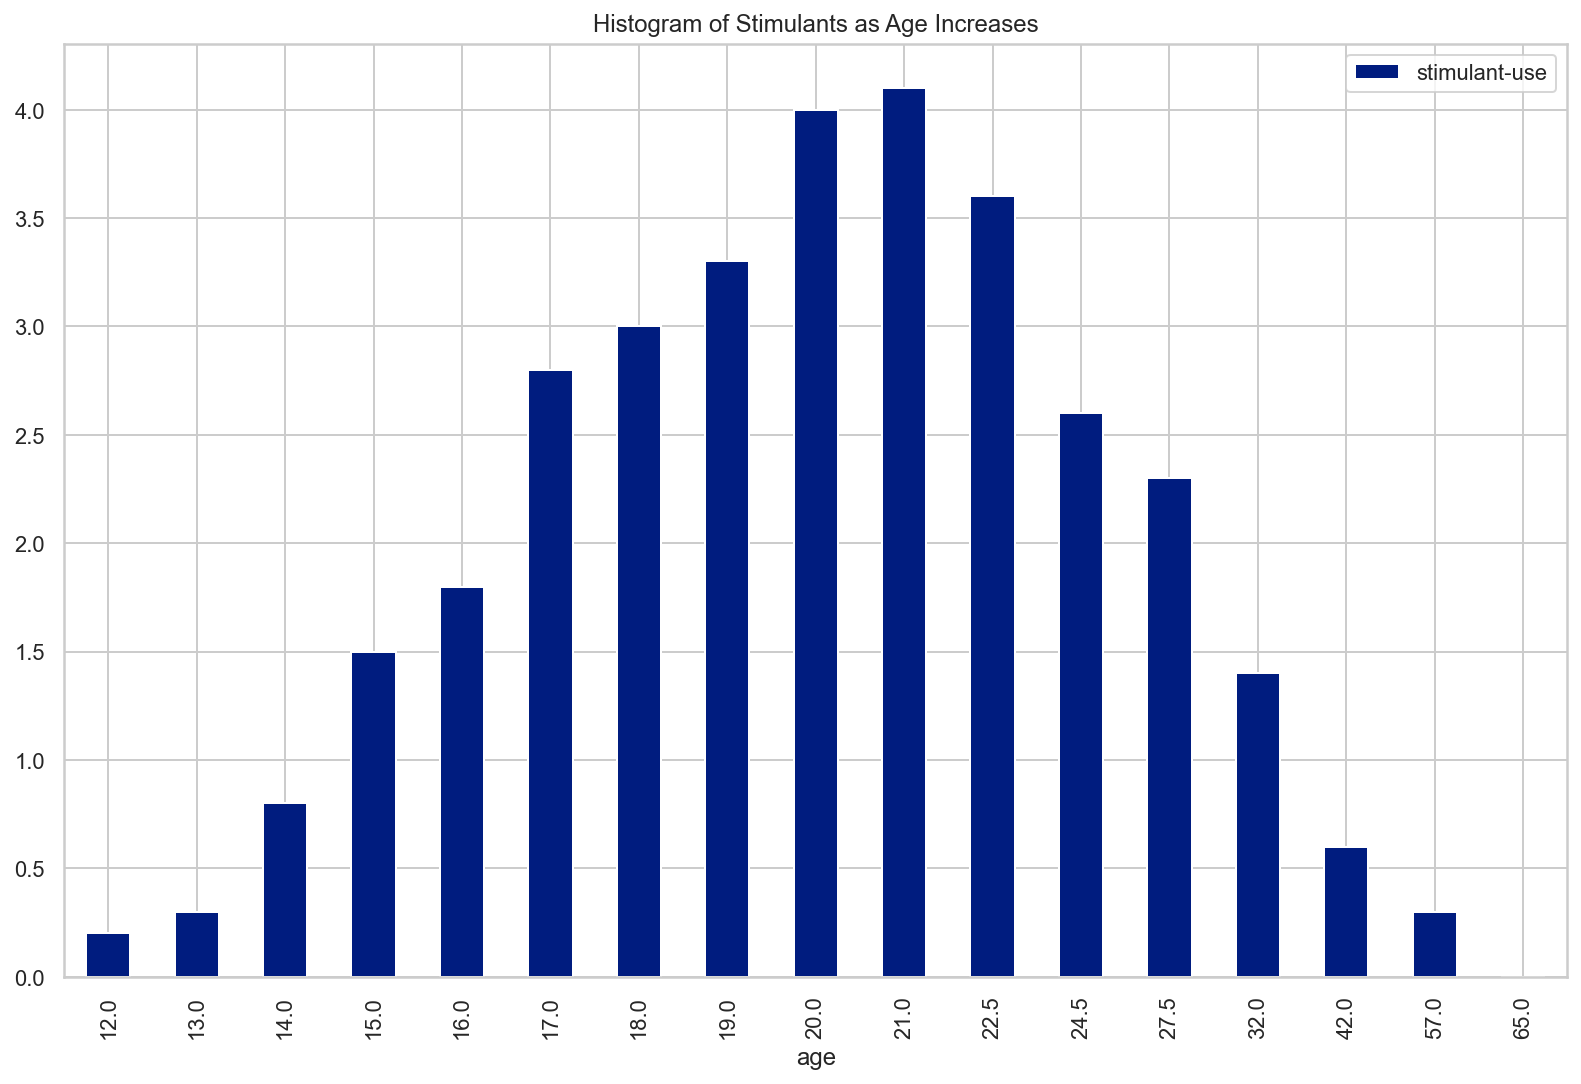

In [161]:
# Showing Stimulants as a bar chart against Age


drug_hypo.plot(x="age", y="stimulant-use", kind='bar', title='Histogram of Stimulants as Age Increases', 
            figsize=(12,8))

The Null Hypothesis of Variable A - Age, and Variable B - Stimulant which stated that there is no correlation between both
has been rejected. 

We can see there is a positive linear relationship between Age 10 - 20. After Age 20 - we can see the curve taper off thus 
displaying an inverse relationship. 




**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Wasn't able to take a look at the Rate table, instead took a look at the Math and Verbal variables.

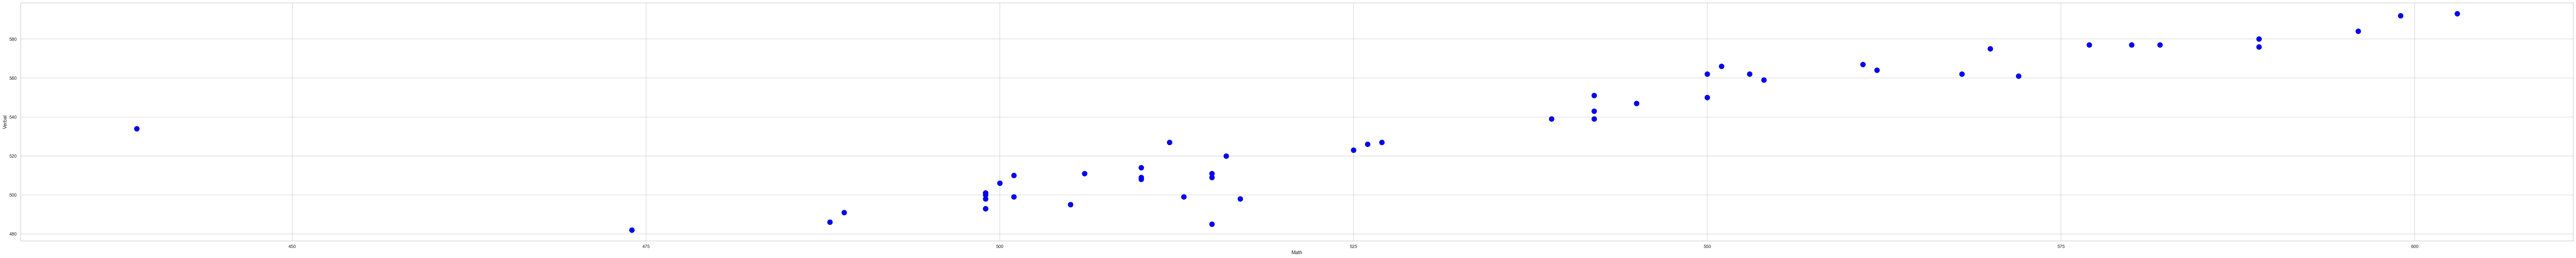

In [162]:
#  Wasn't able to take a look at the Rate table, instead took a look at the Math and Verbal variables.

df_sat_scores_read.plot.scatter(x='Math', y='Verbal', c = 'blue', s = 150)

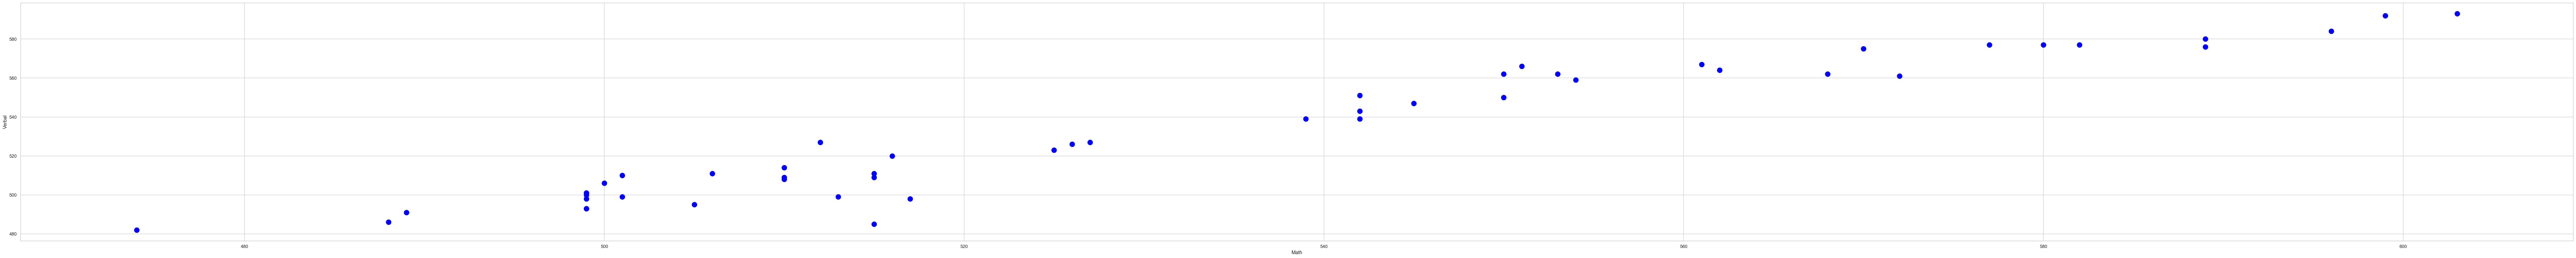

In [163]:
# remove the outlier from dataset
new_sat = df_sat_scores_read.drop([27], axis=0).reset_index()
new_sat.plot.scatter(x='Math', y='Verbal', c = 'blue', s = 150)

In [164]:
#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original
print('Verbal')
print("original verbal mean: {}, verbal mean without outlier: {}".format(df_sat_scores_read['Verbal'].mean(), new_sat['Verbal'].mean()))
print("original verbal median: {}, verbal median without outlier: {}".format(df_sat_scores_read['Verbal'].median(), new_sat['Verbal'].median()))
print("original verbal stdev: {}, verbal stdev without outlier: {}".format(df_sat_scores_read['Verbal'].std(), new_sat['Verbal'].std()))
print("")


print('Math')
print("original math mean: {}, math mean without outlier: {}".format(df_sat_scores_read['Math'].mean(), new_sat['Math'].mean()))
print("original math median: {}, math median without outlier: {}".format(df_sat_scores_read['Math'].median(), new_sat['Math'].median()))
print("original math stdev: {}, math stdev without outlier: {}".format(df_sat_scores_read['Math'].std(), new_sat['Math'].std()))

Verbal
original verbal mean: 532.5294117647059, verbal mean without outlier: 532.5
original verbal median: 527.0, verbal median without outlier: 526.5
original verbal stdev: 33.360667224248665, verbal stdev without outlier: 33.69869494233162

Math
original math mean: 531.843137254902, math mean without outlier: 533.7
original math median: 525.0, math median without outlier: 525.5
original math stdev: 36.28739315465888, math stdev without outlier: 34.120584486703706


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


- Using the spearman rank correlation coeffecient should not be used in the instance if there are repeating ranks found.
- overall value of coeffecient will be weakedned if there is tied ranks. 

**What does the spearman correlation indicate?**

- It is a non parametric ranks based test which shows the correlation coeffecient of r. 
- It is not impacted by outliers, as all values are ranked. 

Pearson: takes into account distance between values and can be impacted very heavily by outliers. 

Spearman correlation: 1 - (6 x sum of d^2 / n^2 - n) 


The Spearman correlation result should fall anywhere between -1 and +1. 



In [165]:
new_sat[['Verbal', 'Math']].corr(method = 'spearman')

Verbal      Math
Verbal  1.000000  0.940218
Math    0.940218  1.000000

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.